### Constructing Words Permutations

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib as mpl
import pandas as pd
import pylab as p
import os
import csv

os.chdir('C:/Users/Miles/Documents/Brown/Ogbunu Lab/Evo Word') # sets the cwd as C:/.../Evo Word

 
with open('3_Letter_OneGrams_1900_2000.csv', 'r') as f:            # for 3 letter words
# with open('4_Letter_OneGrams_1900_2000.csv', 'r') as f:          # for 4 letter words
# with open('5_Letter_OneGrams_1900_2000.csv', 'r') as f:          # for 5 letter words
    reader = csv.reader(f)
    data = list(reader)                                        # googles ngram data
    
    
for i in range(1,len(data)):
    data[i][1:] = map(int,data[i][1:])                         # the above makes all elements str so this turns counts to int
    

ngram_words = []  
for i in range(1,len(data)):
    ngram_words.append(data[i][0])                            # words from googles ngram
      

IN = 'EAT'                                                    # test words (my favorite from the list of Da_Words)
OUT = 'FUR'

A = IN
rnge = [0,1,2]                                                # for 3 letter words
# rnge = [0,1,2,3]                                            # for 4 letter words
# rnge = [0,1,2,3,4]                                          # for 5 letter words
path = []

while int(A==OUT)==0:
    letter = np.random.choice(rnge)
    rnge.remove(letter)
    B = list(A)
    B[letter] = OUT[letter]
    B = ''.join(B)
    if B in ngram_words:
        A = B
        path.append(A)
    else:
        A = IN
        rnge = [0,1,2]                                                # for 3 letter words
        # rnge = [0,1,2,3]                                            # for 4 letter words
        # rnge = [0,1,2,3,4]                                          # for 5 letter words
        path = []

            
    
print(IN)
for each in path:
    print(each)

EAT
EAR
FAR
FUR


### Trimming Down to Popular Words

In [2]:
pop_words = [data[i][0] for i in range(1,251)]     # for 3 letter words (250 most popular)
# pop_words = [data[i][0] for i in range(1,251)]   # for 4 letter words (500 most popular) 
# pop_words = [data[i][0] for i in range(1,251)]   # for 5 letter words (5000 most popular)

### Word Constructor (gives pairs with paths WITHIN the 250 most popular set of words)

In [3]:
%%time
def like_words(X,letter):                      # constructs a lst of words like X but with a different letter (@ letter) 
    Y = X[:letter]+X[letter+1:]
    sims = []
    for each in pop_words:
        test = each[:letter]+each[letter+1:]
        if test == Y:
            sims.append(each)
    sims.remove(X)
    return sims

def new_word(X,letter):                         # picks a random word from like_words (if no like word then returns 0)
    test_words = like_words(X,letter)
    if len(test_words)>0:
        new = np.random.choice(test_words)
        return new
    else:
        return 0

N = 100
i = 0
Da_Words = []

while i < N:
    condition = 0                          # initializes a break condition in the second while loop
    rnge = [0,1,2]                                                # for 3 letter words
#     rnge = [0,1,2,3]                                            # for 4 letter words
#     rnge = [0,1,2,3,4]                                          # for 5 letter words
    word1 = np.random.choice(pop_words)  
    Da_Words.append([word1])
    r = np.random.choice(rnge)
    rnge.remove(r)
    word2 = new_word(word1,r)
    i = i + 1
    while condition==0:
        if word2 == 0:
            Da_Words.remove(Da_Words[i-1])
            condition = 1                  # breaks the while loop if can't find a new_word
            i = i - 1
            continue
        if len(rnge)==0:
            Da_Words[i-1].append(word2)
            condition = 1                  # breaks the loop if it reaches the last letter
        else:
            r = np.random.choice(rnge)
            rnge.remove(r)
            word2 = new_word(word2,r)

           
        
        
for each in Da_Words:
    print(each)



['DAN', 'LOS']
['FAR', 'NOT']
['SIT', 'MAX']
['PEN', 'SIX']
['RES', 'BAD']
['WHY', 'TIE']
['HAS', 'LOW']
['FAR', 'EST']
['ROW', 'LIT']
['THE', 'SEA']
['AIM', 'HAS']
['SIT', 'PEN']
['ROY', 'FAT']
['FUN', 'EAR']
['CON', 'SIT']
['TEL', 'PIN']
['AND', 'SIR']
['FAT', 'SIR']
['LAY', 'HOT']
['CAN', 'VOL']
['RAW', 'MIN']
['DES', 'PAN']
['SIX', 'HAT']
['RIO', 'GOD']
['GAY', 'LOW']
['DON', 'TEL']
['BAD', 'MET']
['QUE', 'DID']
['FUR', 'SIN']
['DIE', 'LOT']
['JOY', 'BUS']
['VON', 'SIR']
['BAY', 'MIN']
['PER', 'RAN']
['ROY', 'WAR']
['LET', 'HON']
['GAS', 'LED']
['HON', 'RAT']
['WEB', 'HIT']
['FAR', 'MIT']
['HIS', 'BAD']
['MAD', 'RUN']
['HON', 'LAW']
['BIT', 'CAR']
['DON', 'YES']
['GOT', 'RED']
['GAP', 'CUT']
['NON', 'FUR']
['LAW', 'ROD']
['HIT', 'NOR']
['ONE', 'PRO']
['BAD', 'MEN']
['DRY', 'HAS']
['MIT', 'FOX']
['BOB', 'GUY']
['DOG', 'CAN']
['BAR', 'FOX']
['SKY', 'LAW']
['HAT', 'DES']
['NEW', 'FOR']
['BAR', 'PIG']
['LOG', 'FEE']
['LEE', 'BIT']
['EAR', 'FIT']
['GOT', 'MEN']
['DAN', 'PER']
['DIE', 'L

### Words Chains

In [4]:
da_words = Da_Words            # establishes a list of pairs of words (constructed from the scrabble library)

bits = []
for i in range(8):             # constructs the 3-bit strings from 0 to 7
    bits.append('{0:03b}'.format(i))

indices = []

for each in bits:
    b = list(each)
    indices.append([n for (n, e) in enumerate(b) if e == '1'])
    

word_chain = []

for j in range(len(da_words)):
    wordA = da_words[j][0]
    wordB = da_words[j][1]
    word_chain.append([wordA])
    i = 1
    while i<len(bits):
        word = list(wordA)
        for each in indices[i]:
            word[each] = wordB[each]
        word = ''.join(word)
        word_chain[j].append(word)
        i = i + 1



### Constructing the array of fitness values

In [5]:
%%time

W = []
for i in range(len(Da_Words)):                            # this indexes over the pairs of words
    W.append([])
    for j in range(len(data[i][1:])):                     # this indexes over the years
        W[i].append([])
        for those in word_chain[i]:                       # this indexes over those in the word chain
            if those in ngram_words:
                index = 1 + ngram_words.index(those)      # we add 1 bc ngram_words is an index below words_from_google
                W[i][j].append(data[index][j+1])
            else:
                W[i][j].append(0)
      

Wall time: 2.48 s


### "Da_Words" Graphs

C:\Users\Miles\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Wall time: 18.8 s


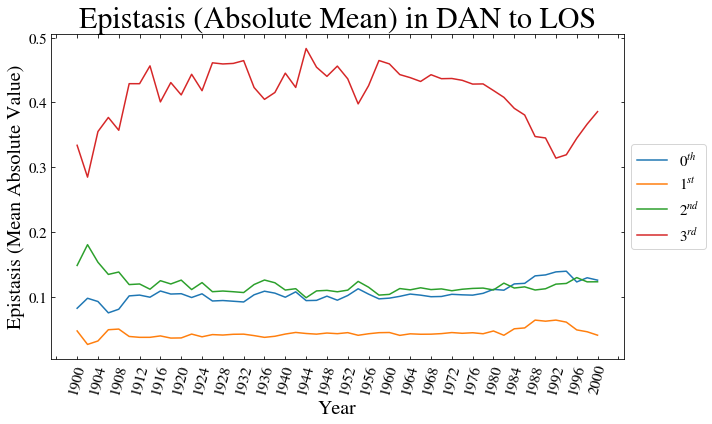

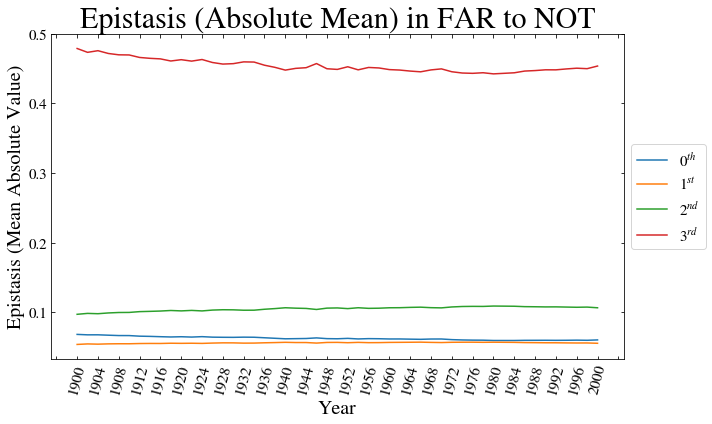

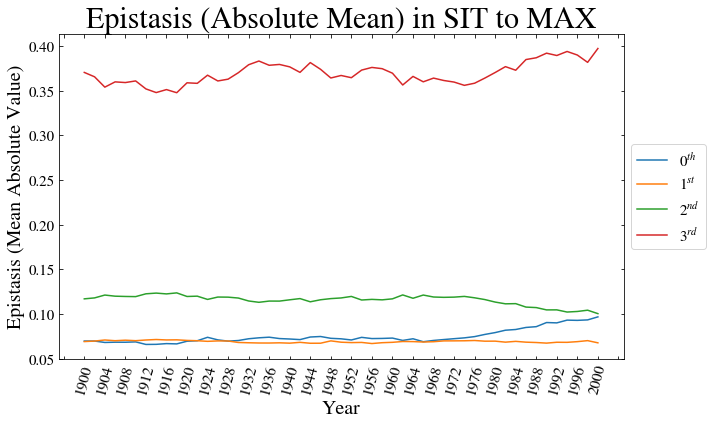

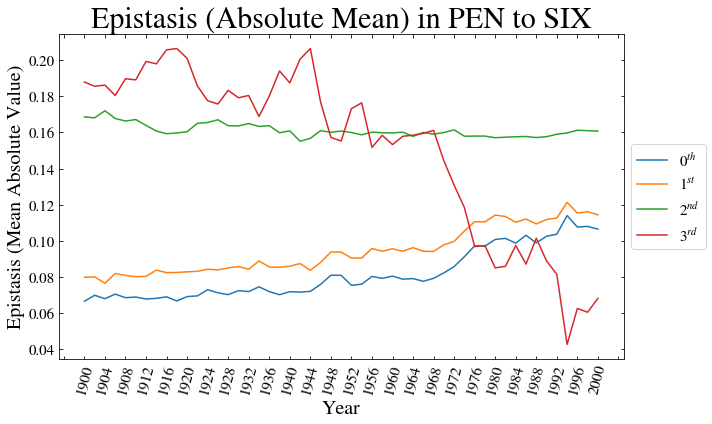

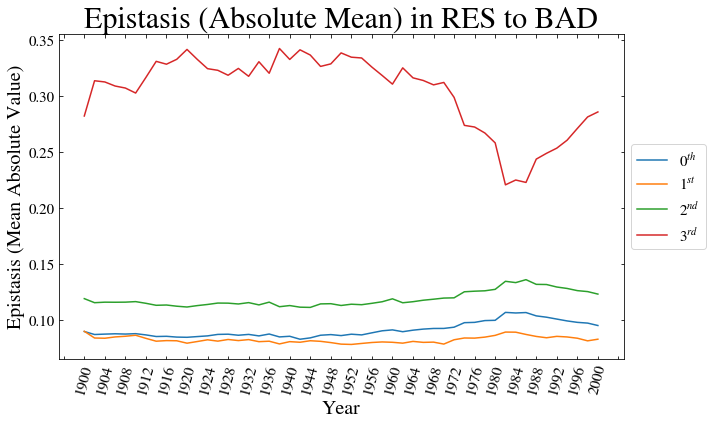

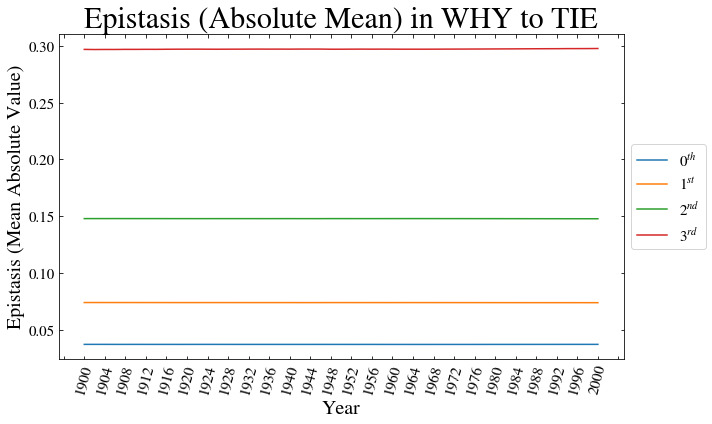

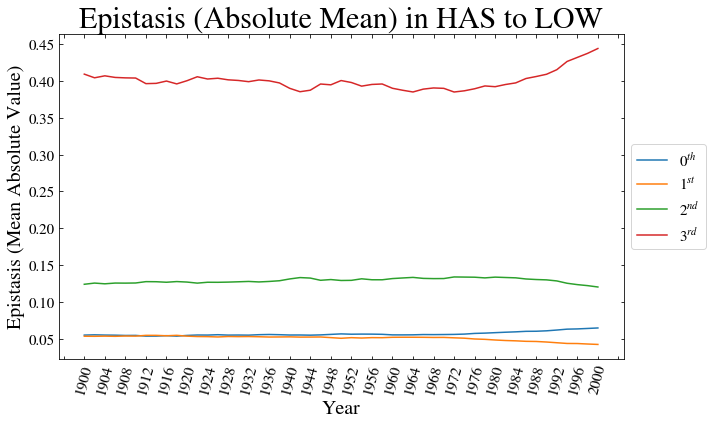

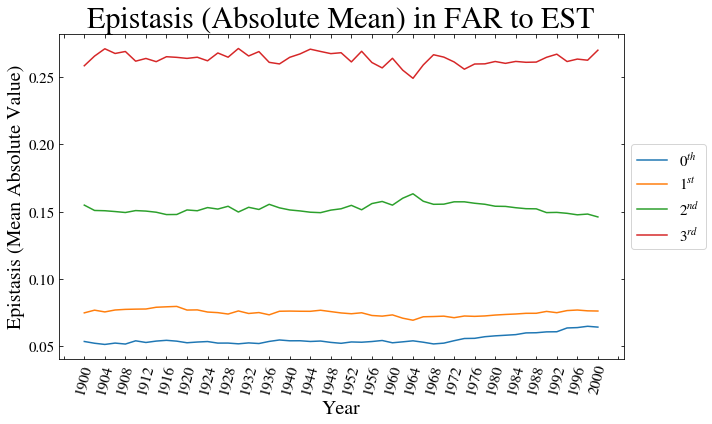

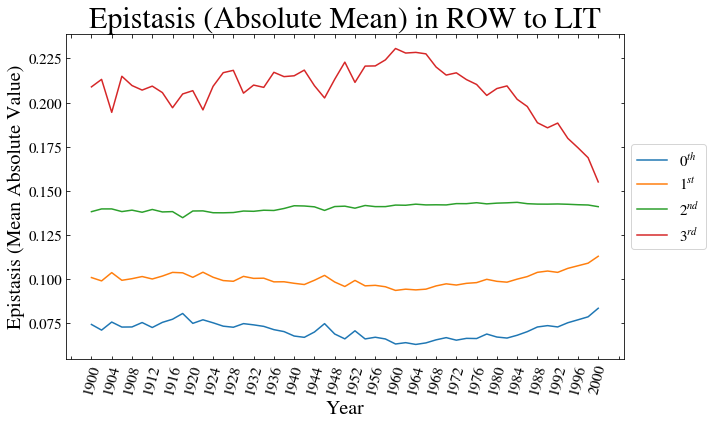

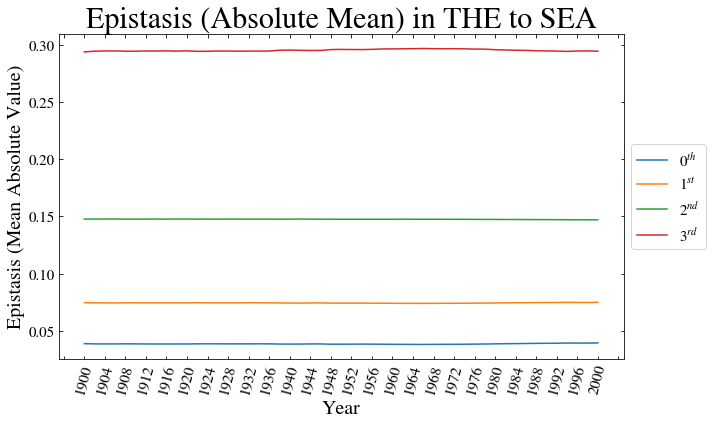

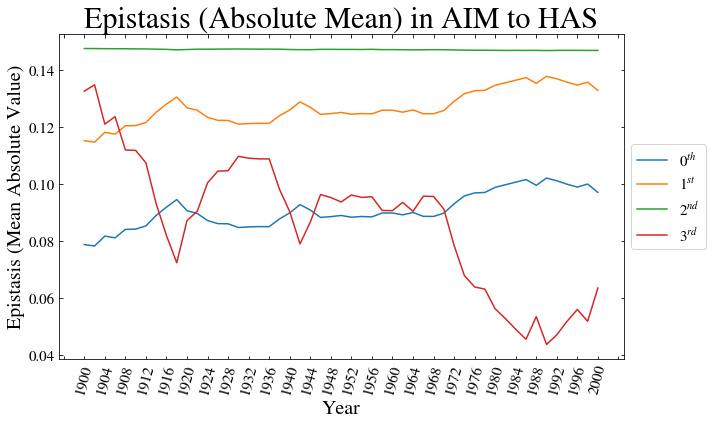

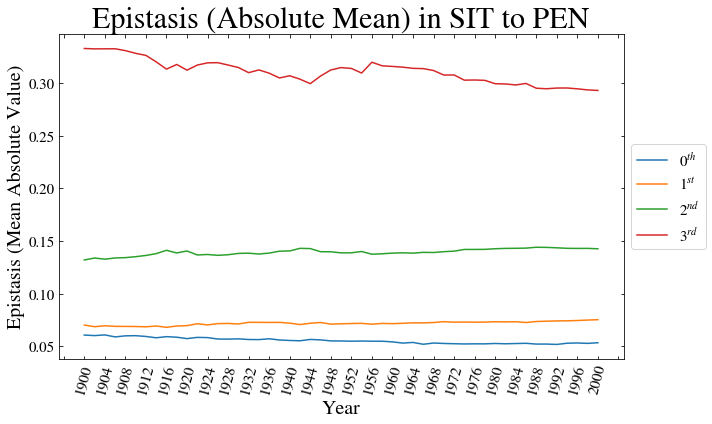

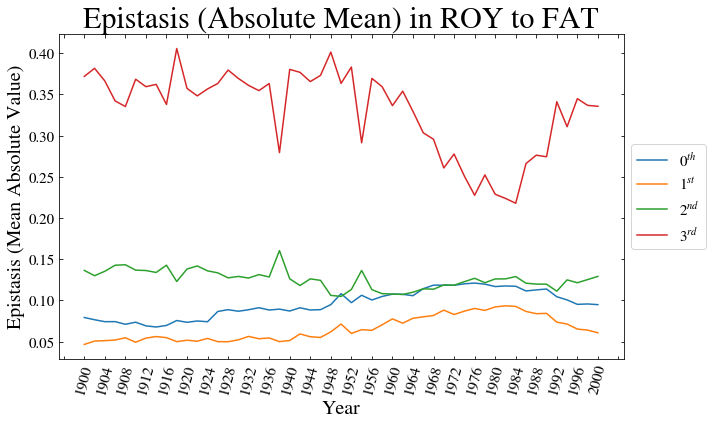

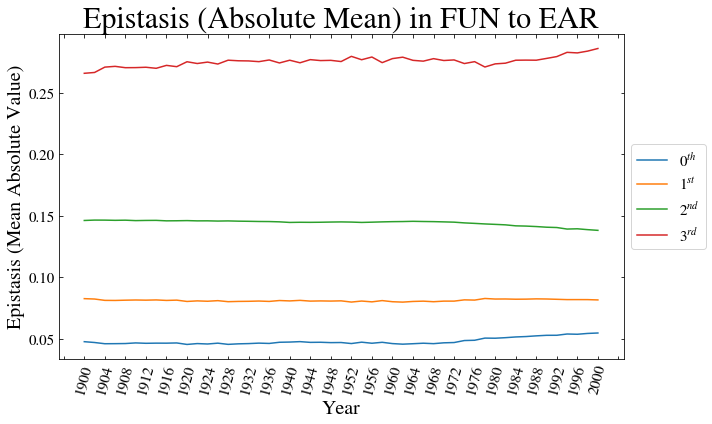

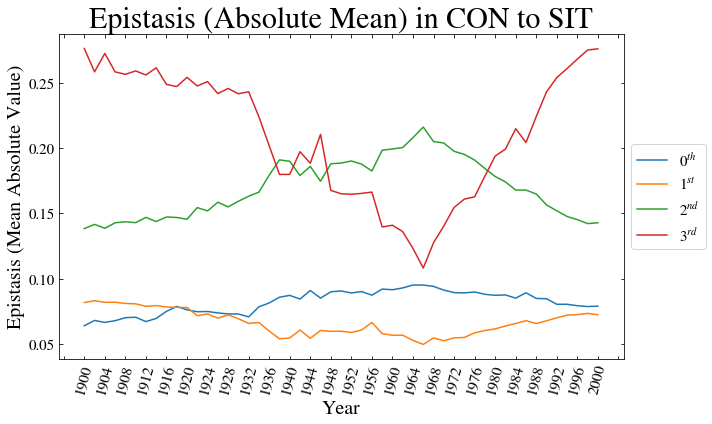

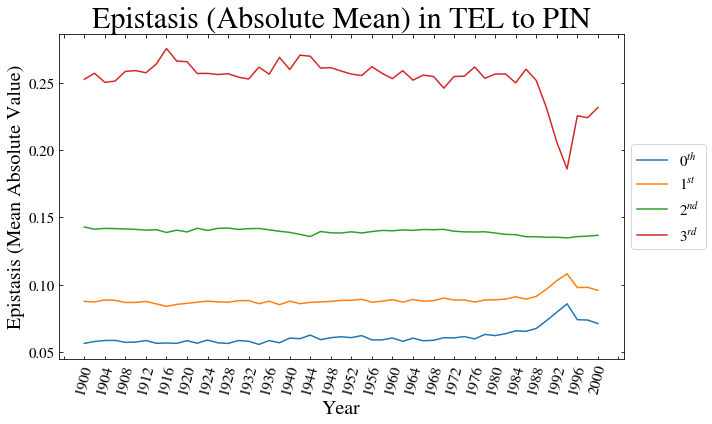

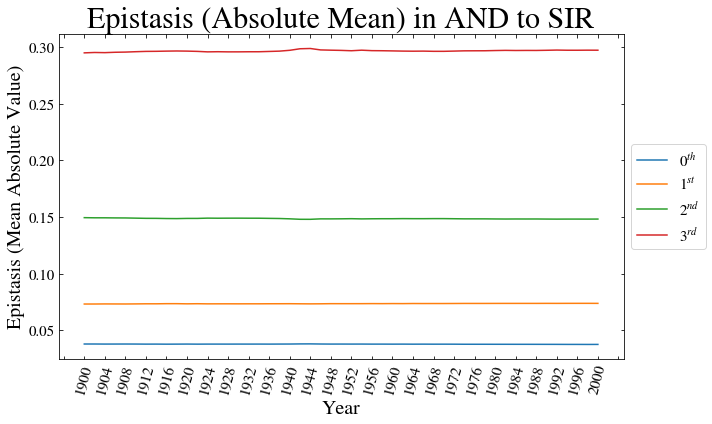

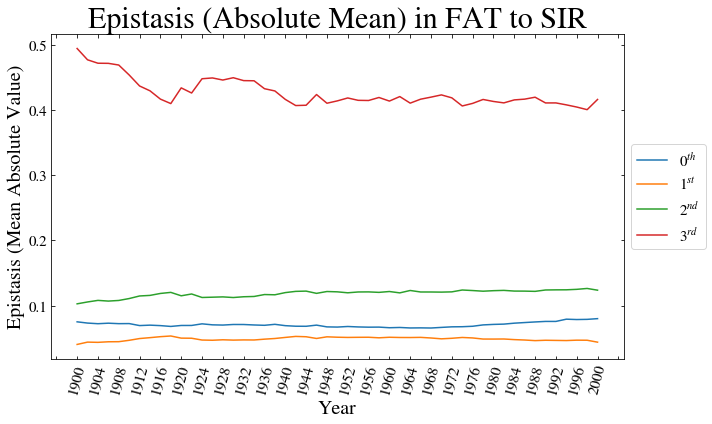

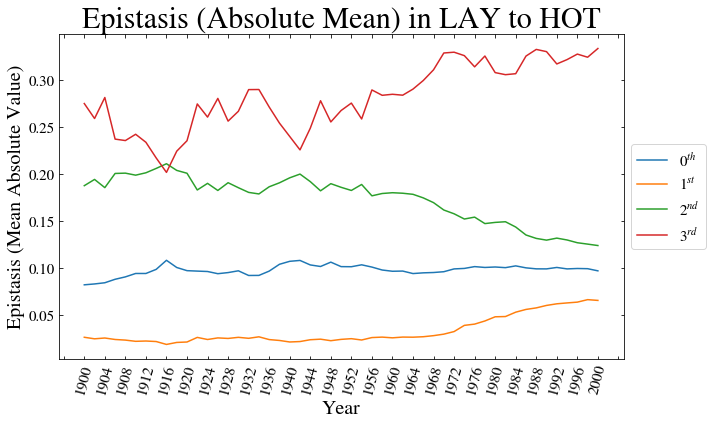

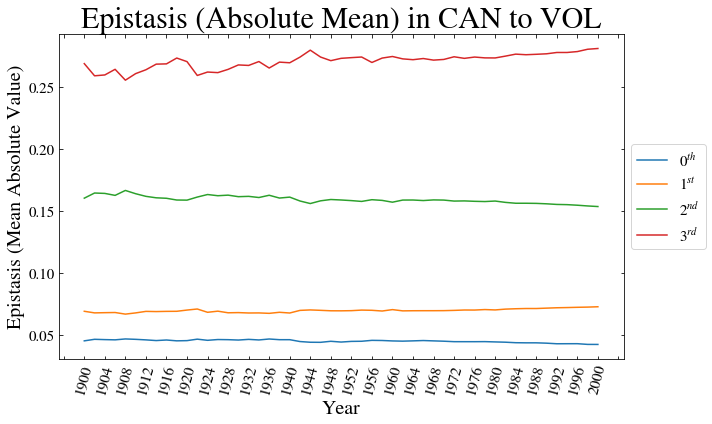

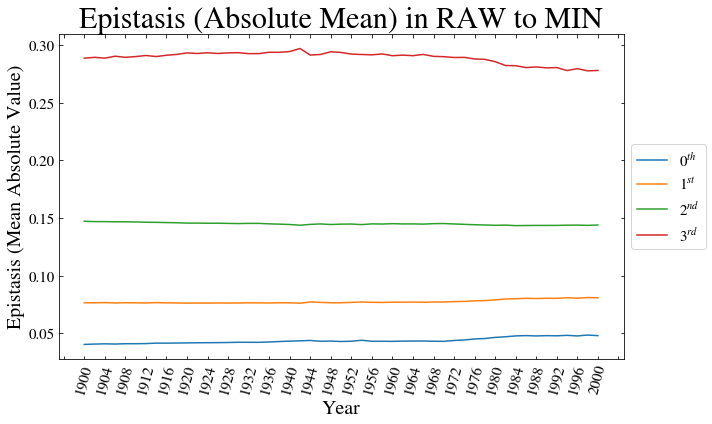

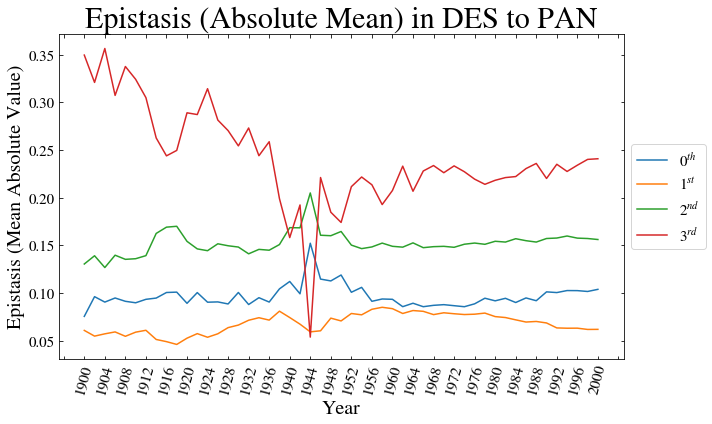

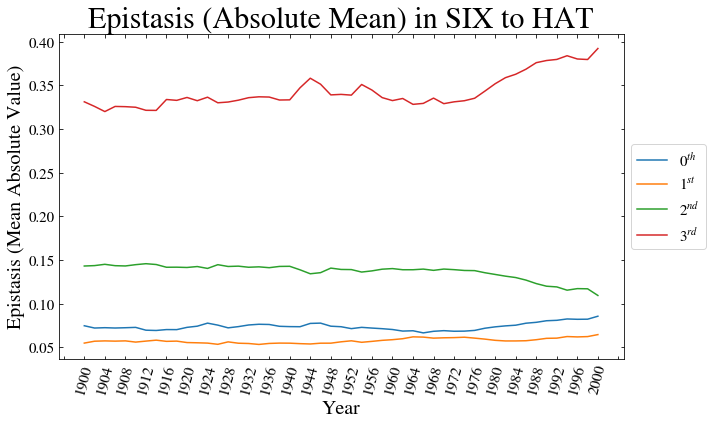

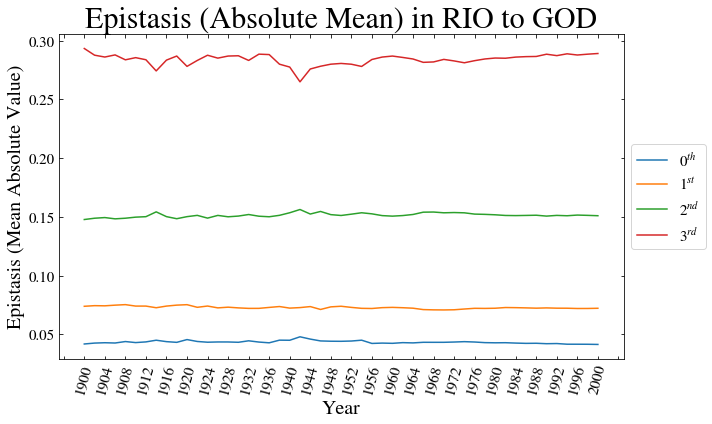

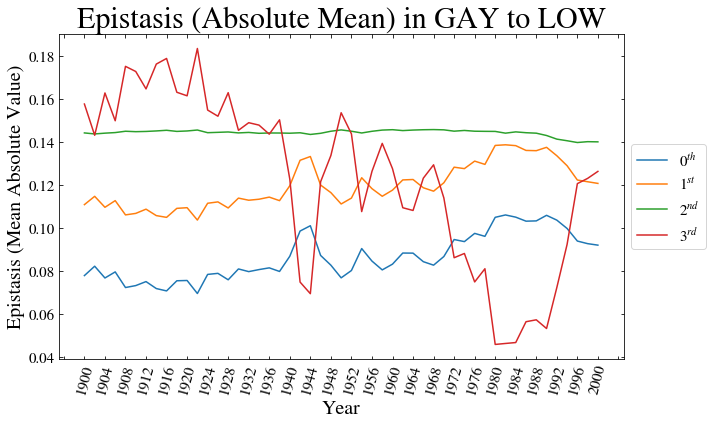

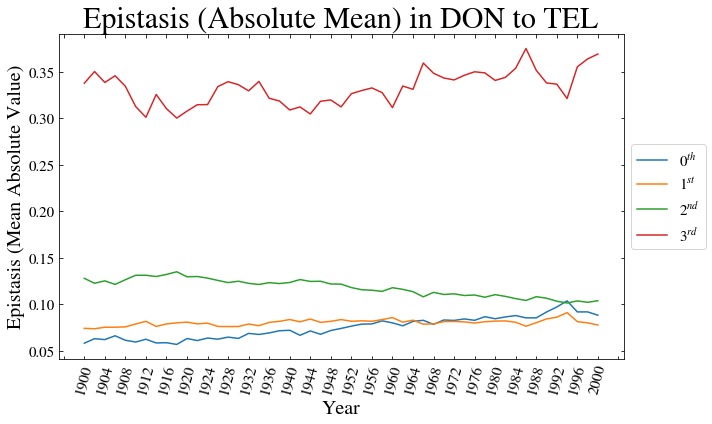

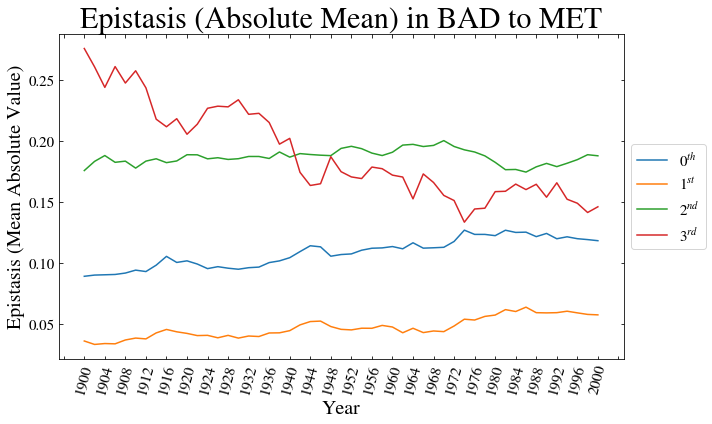

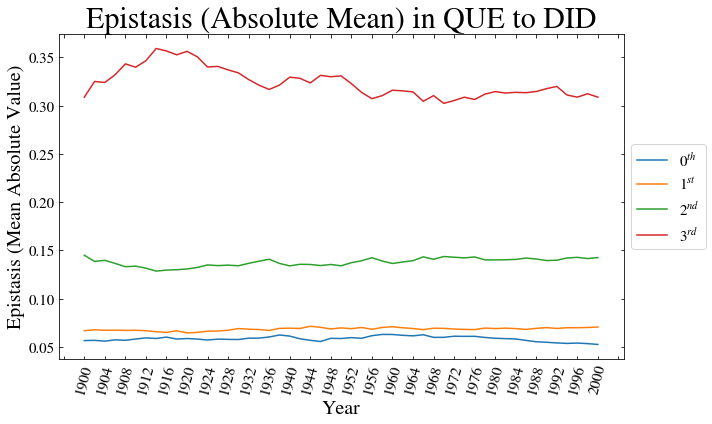

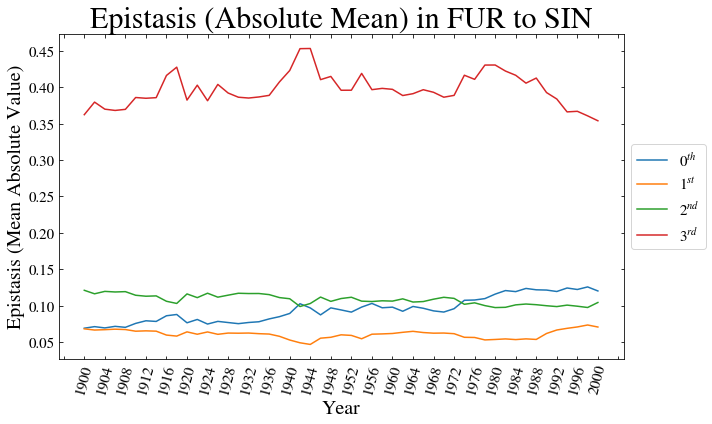

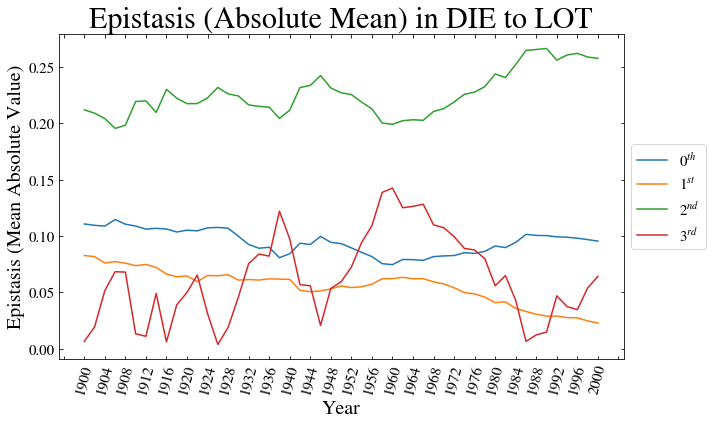

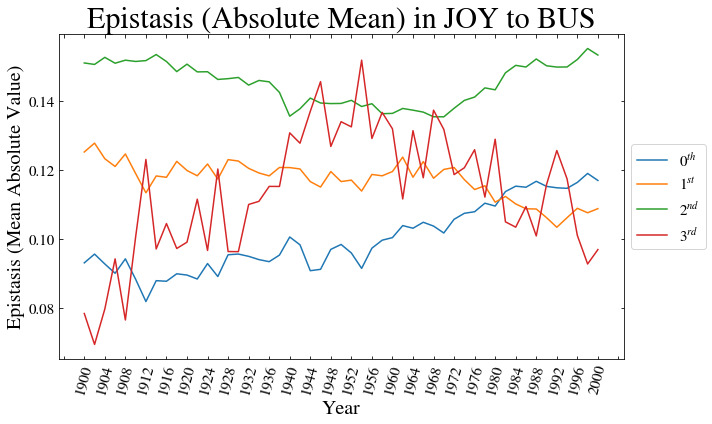

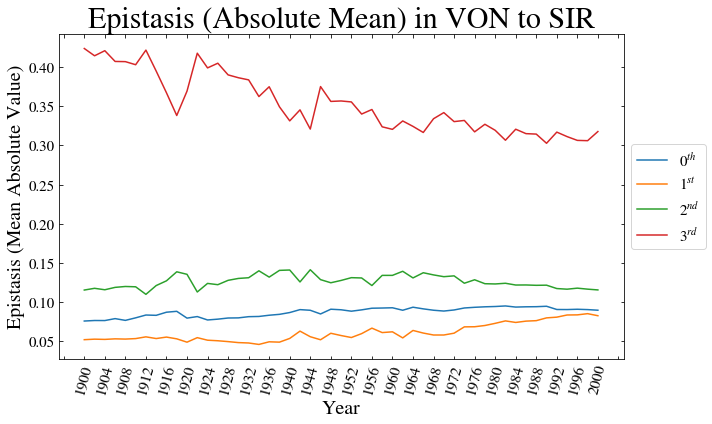

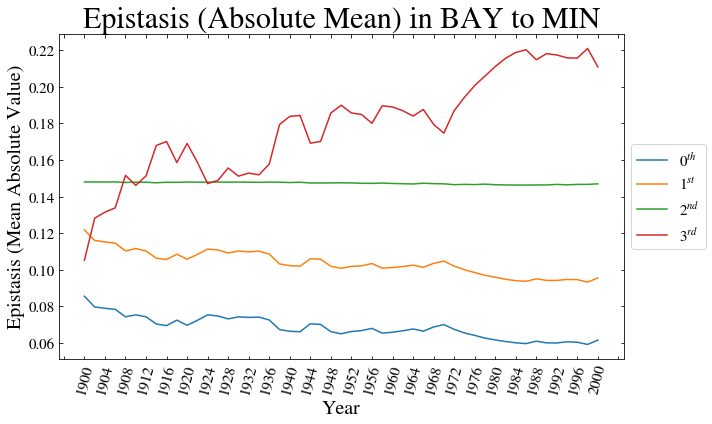

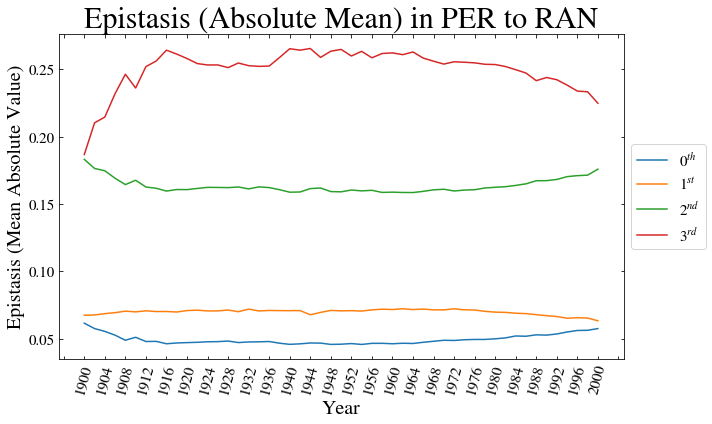

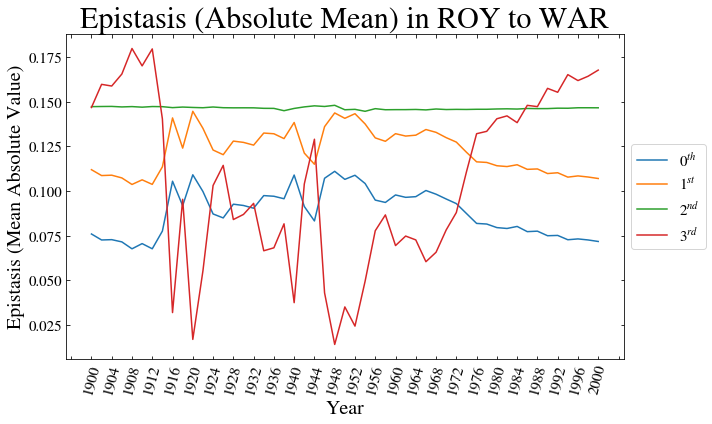

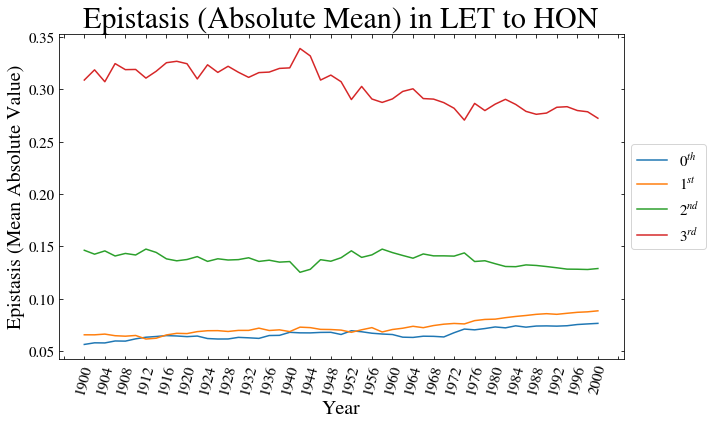

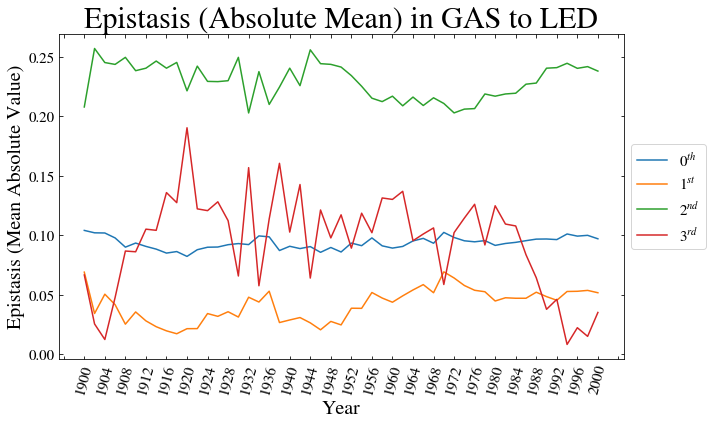

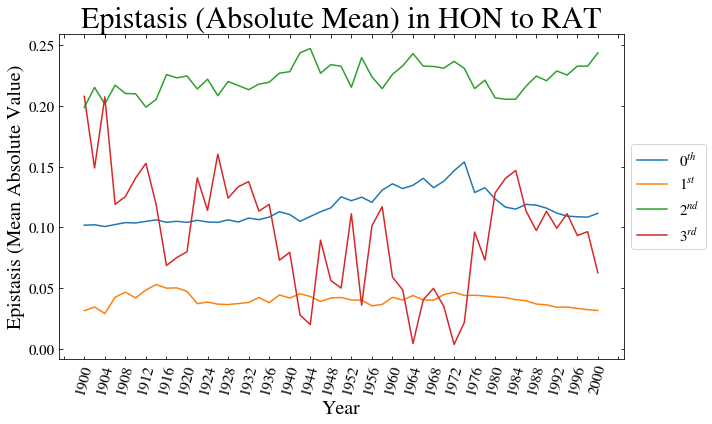

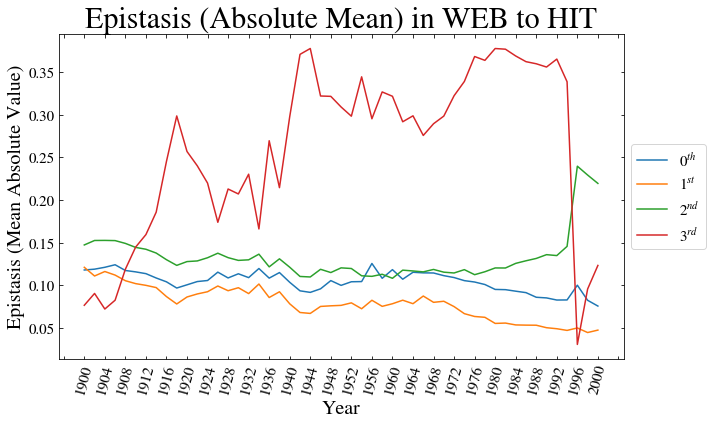

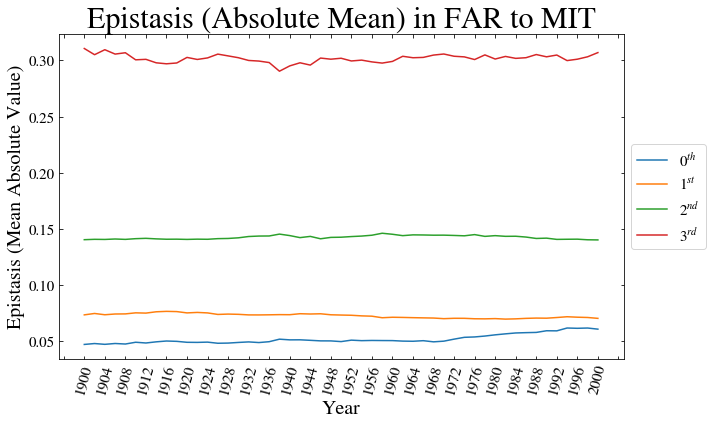

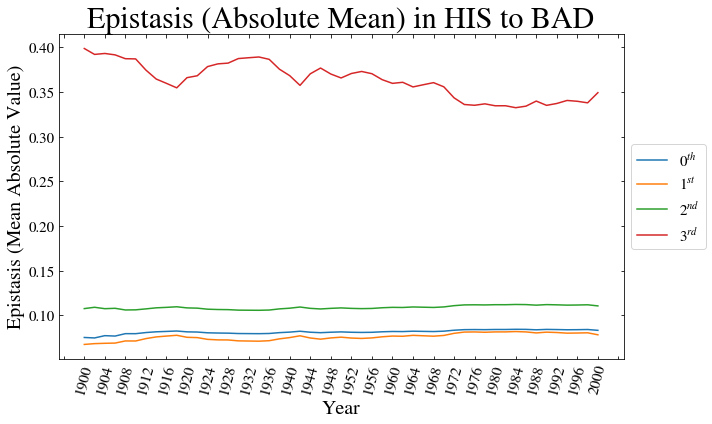

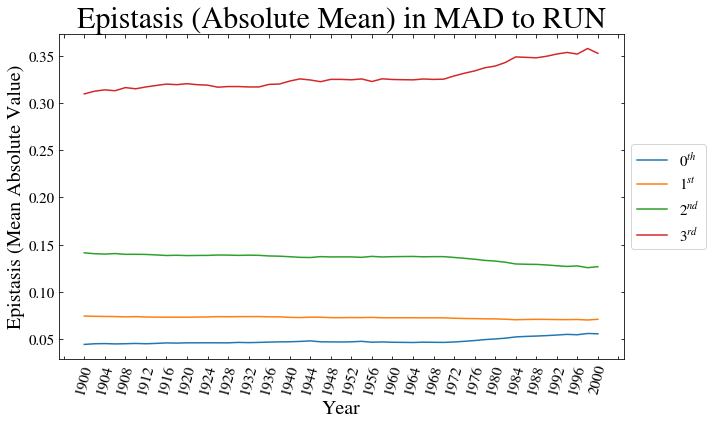

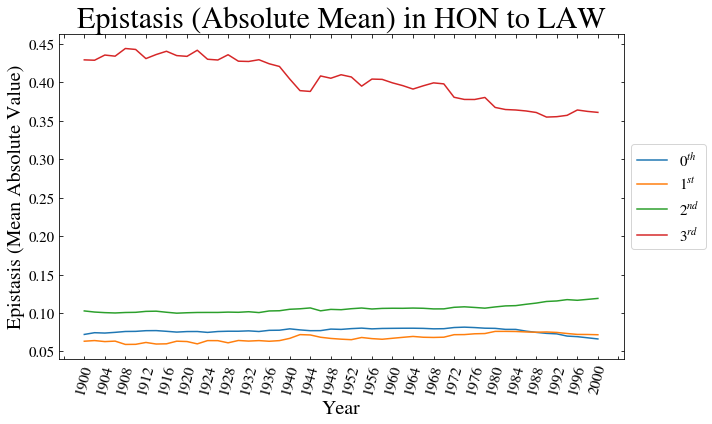

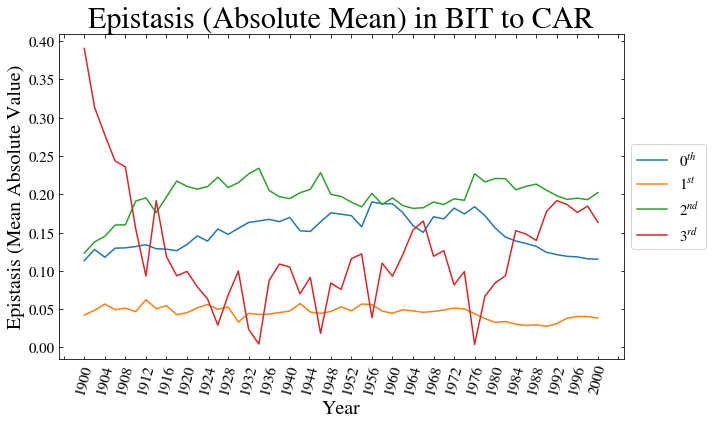

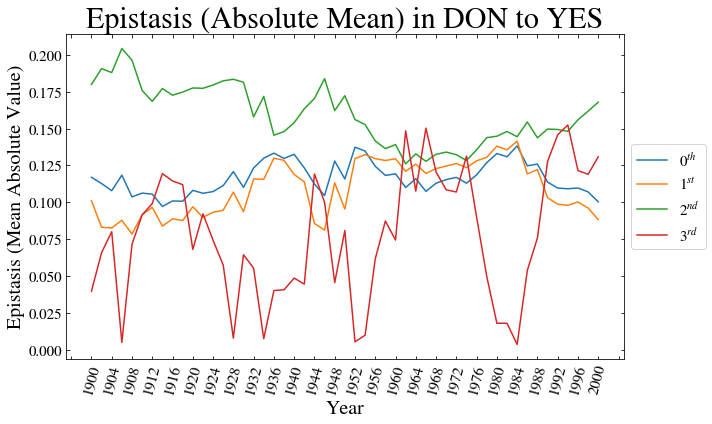

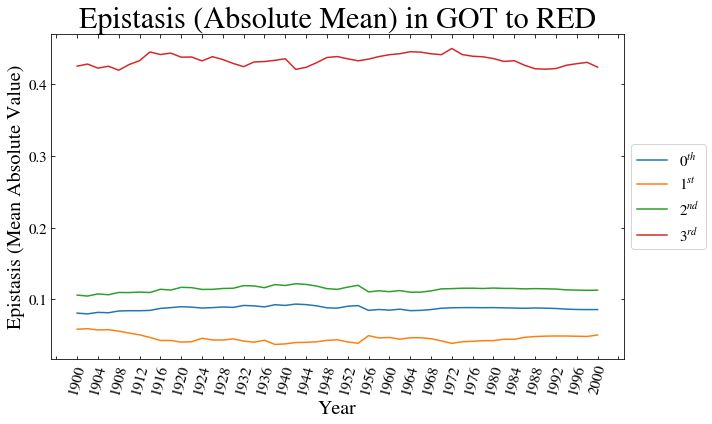

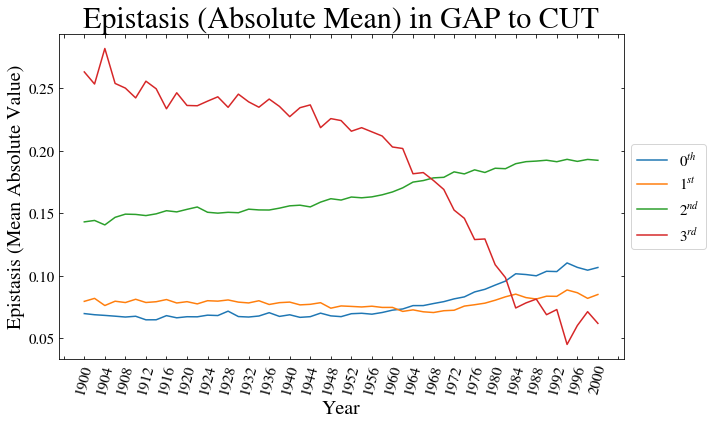

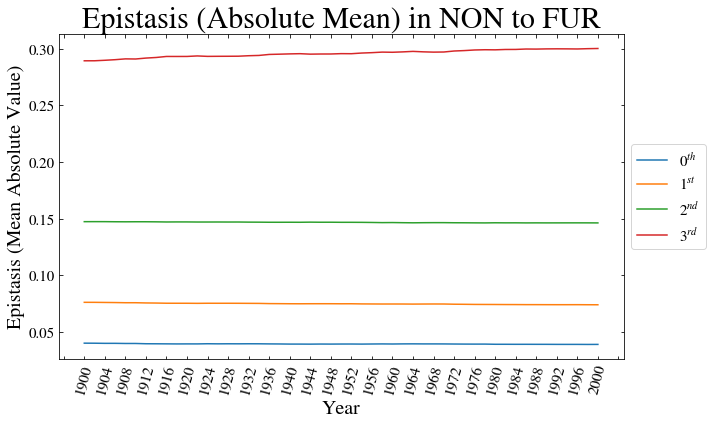

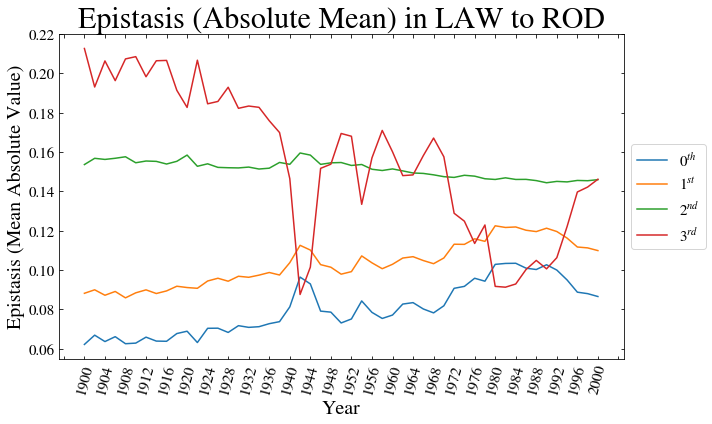

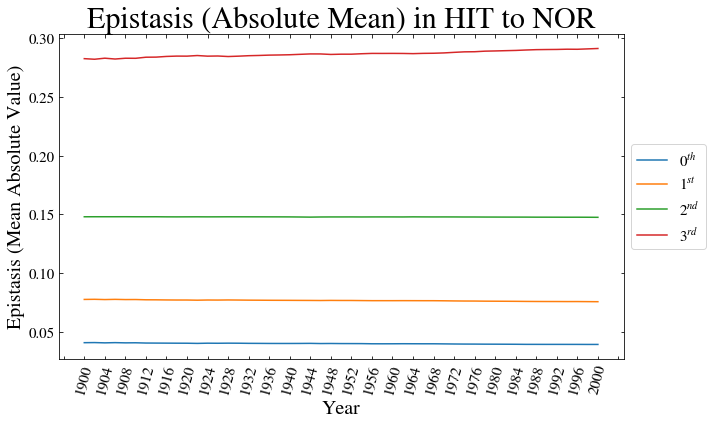

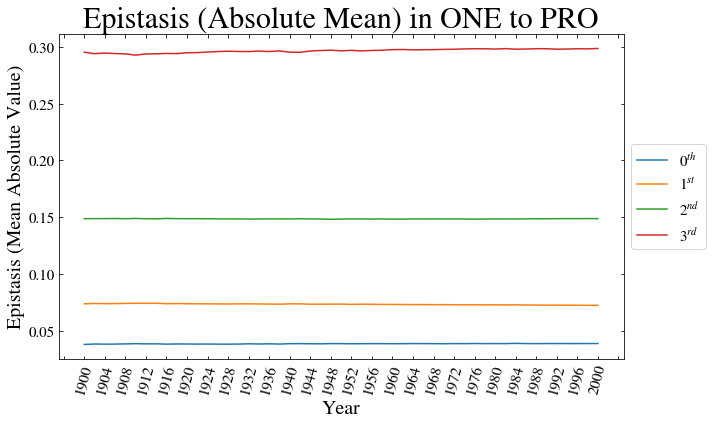

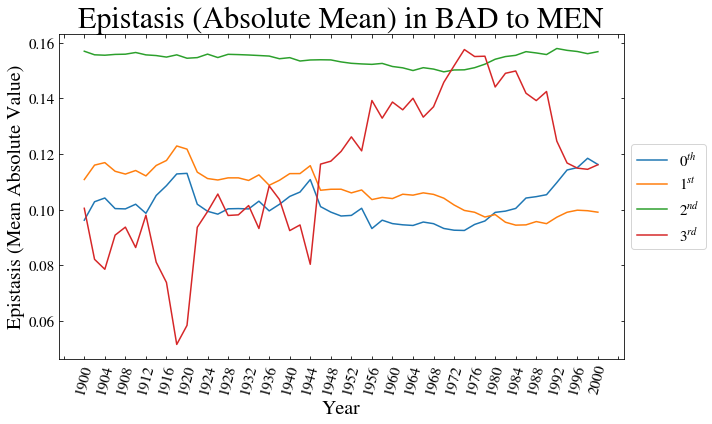

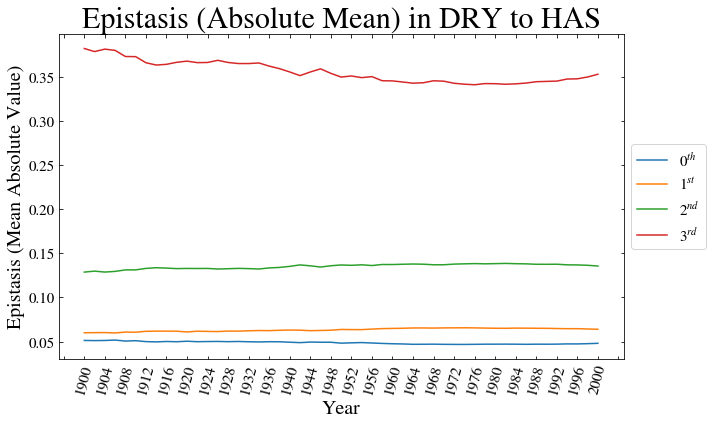

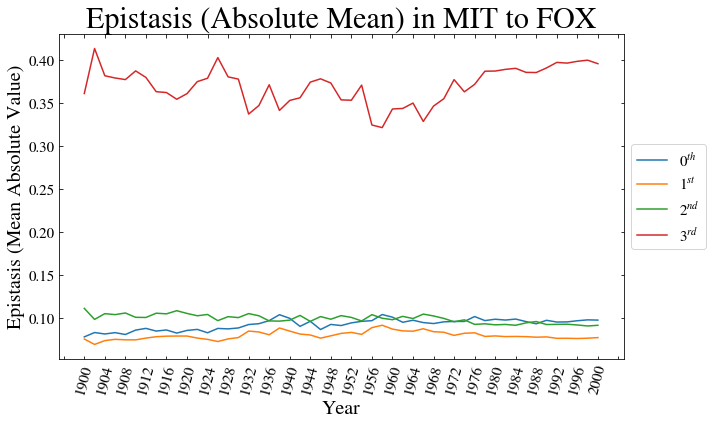

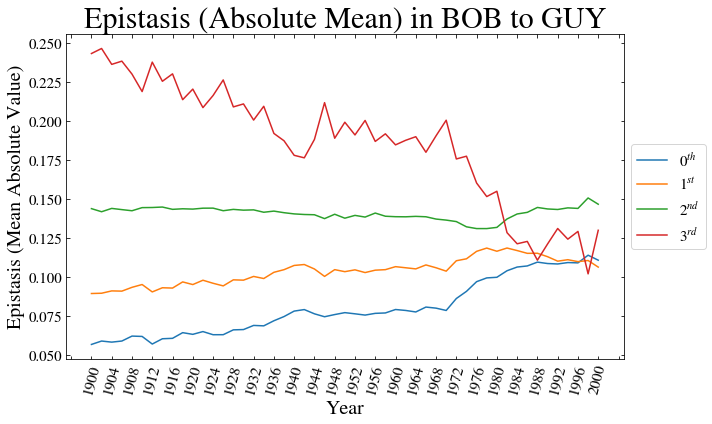

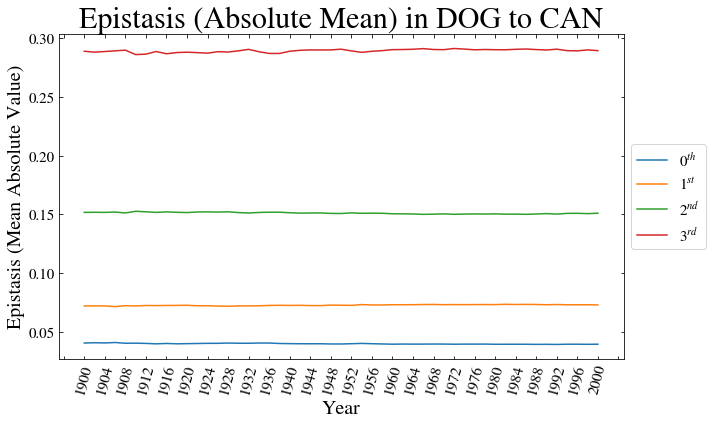

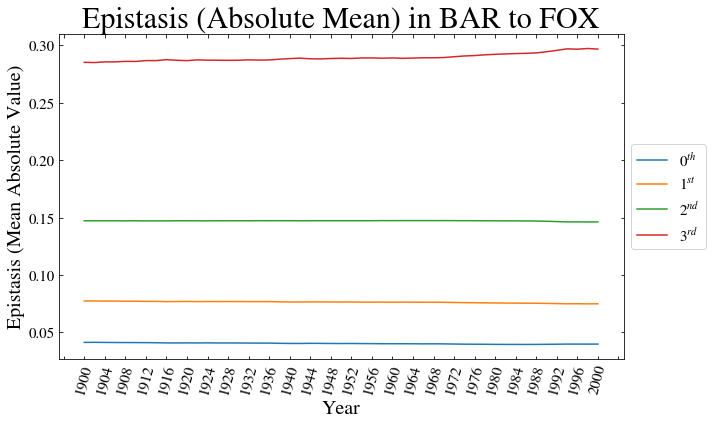

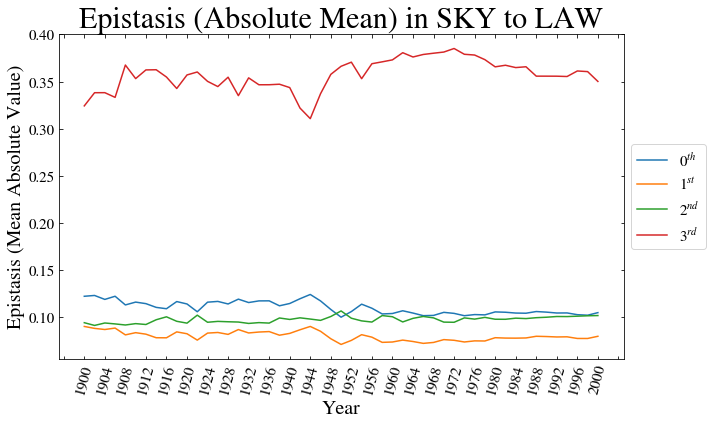

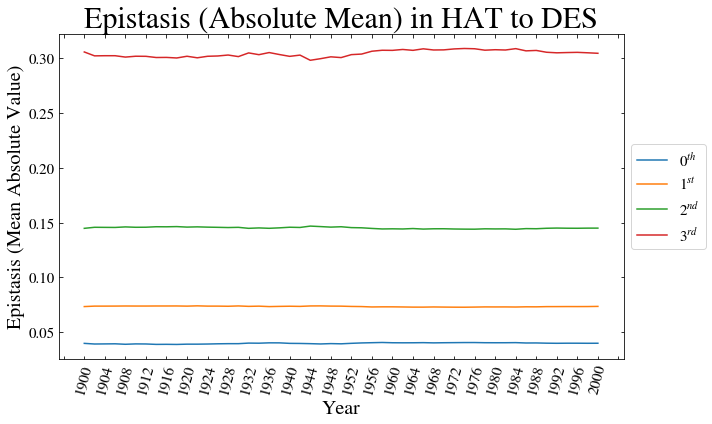

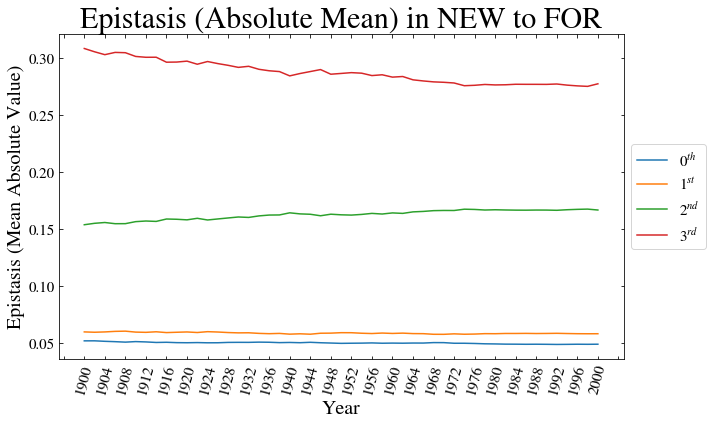

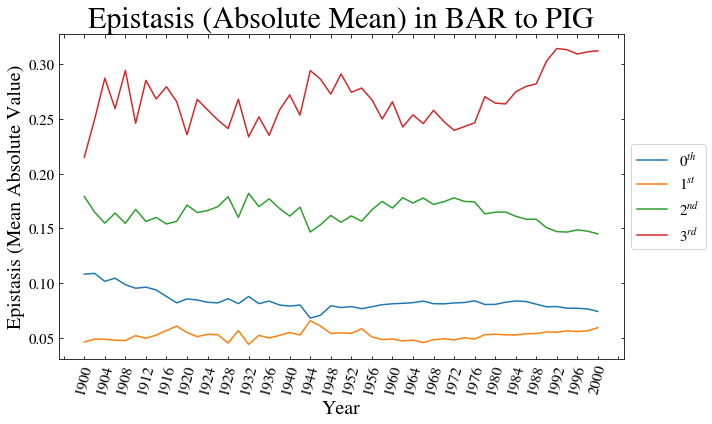

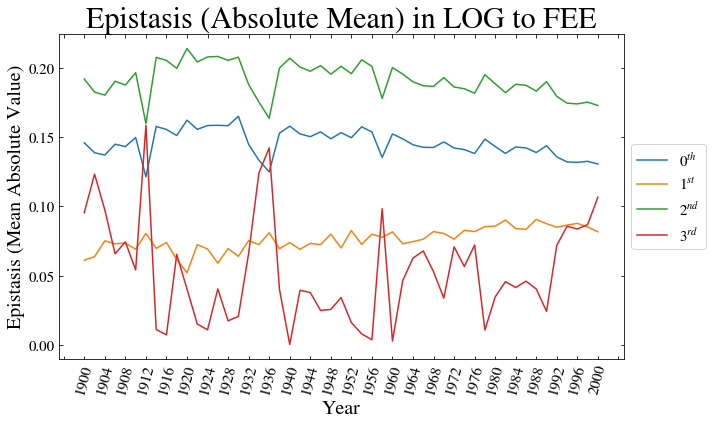

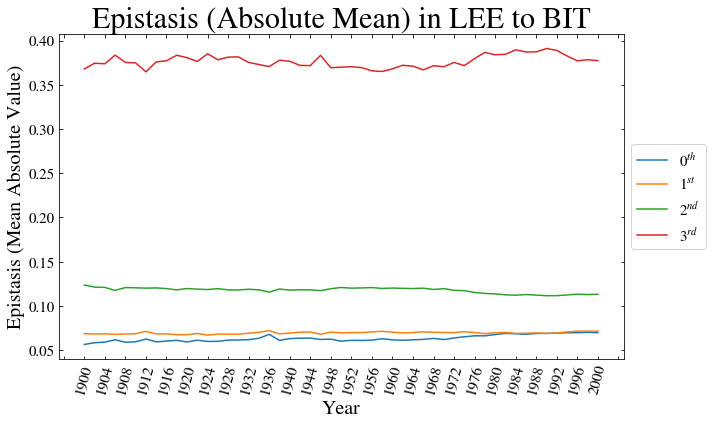

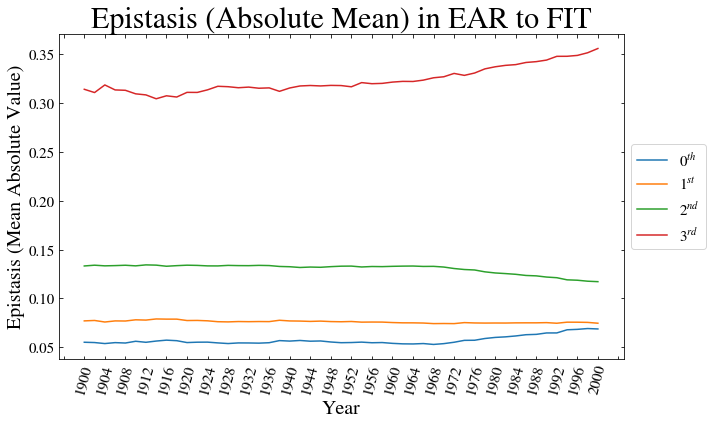

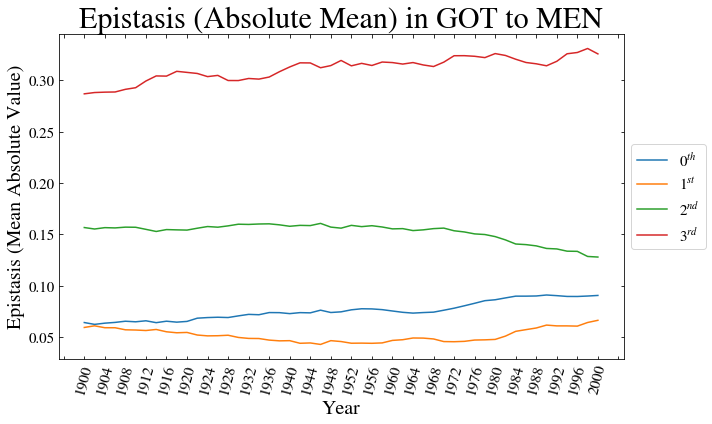

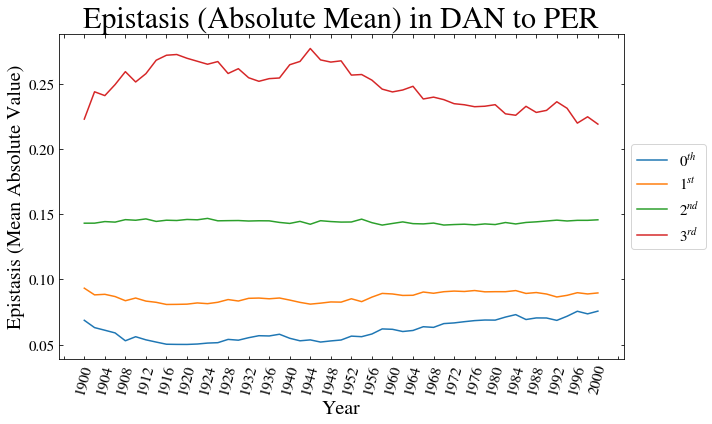

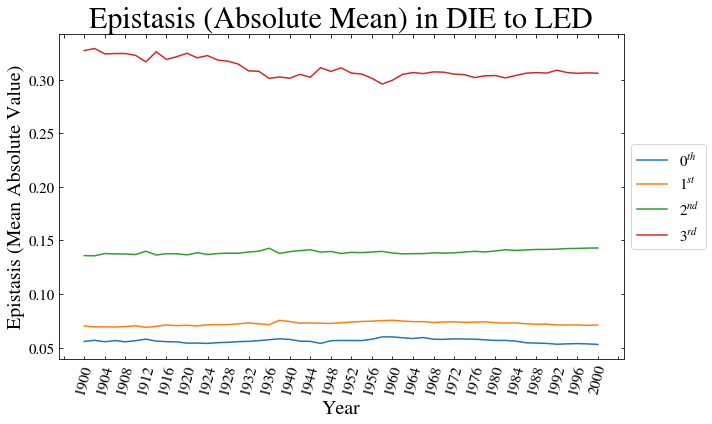

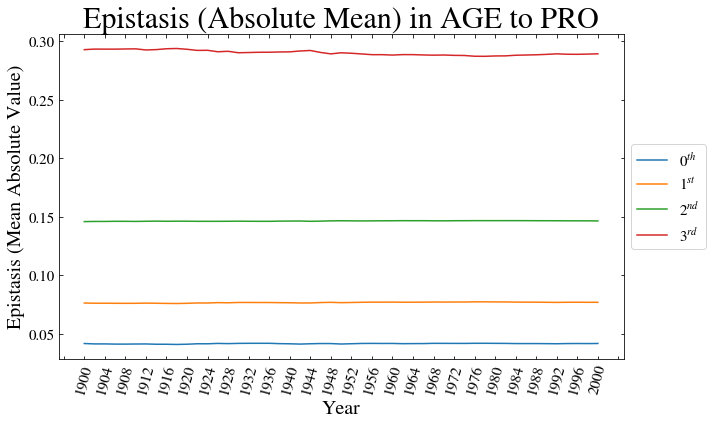

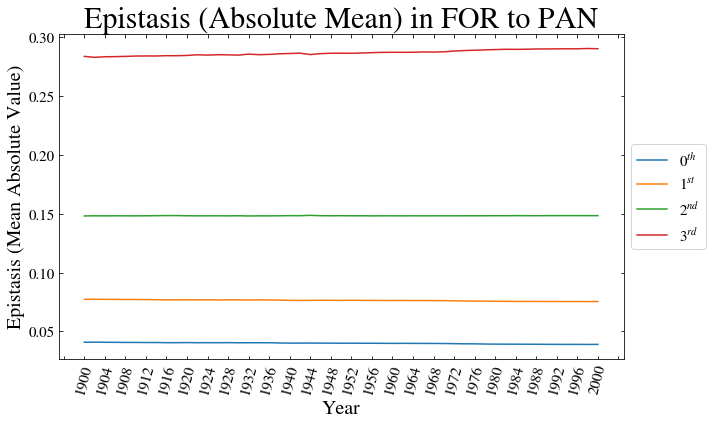

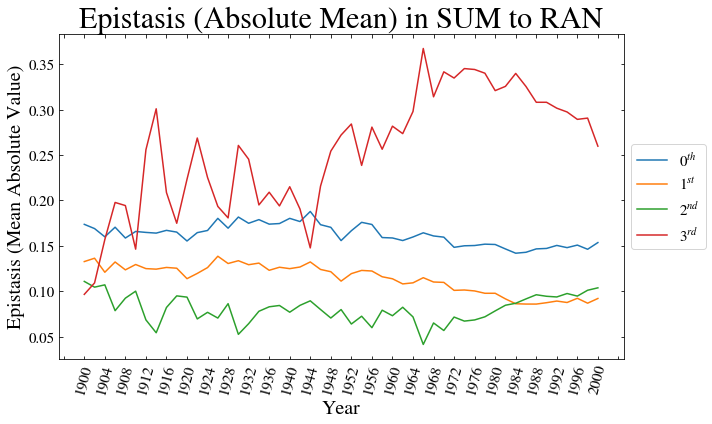

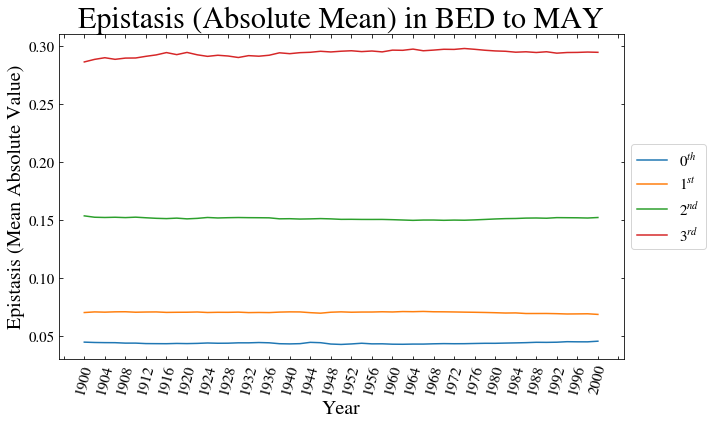

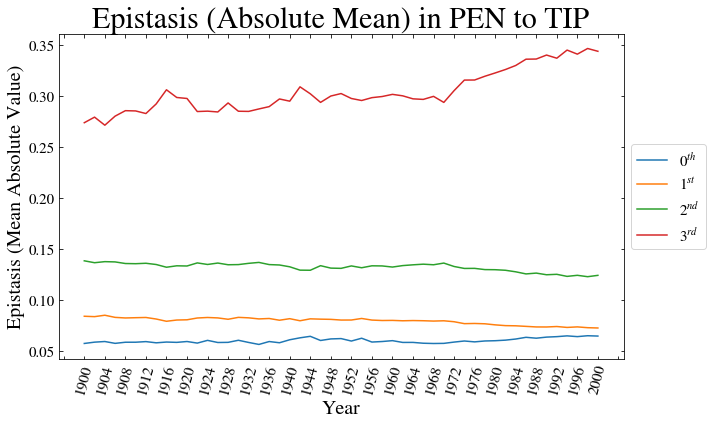

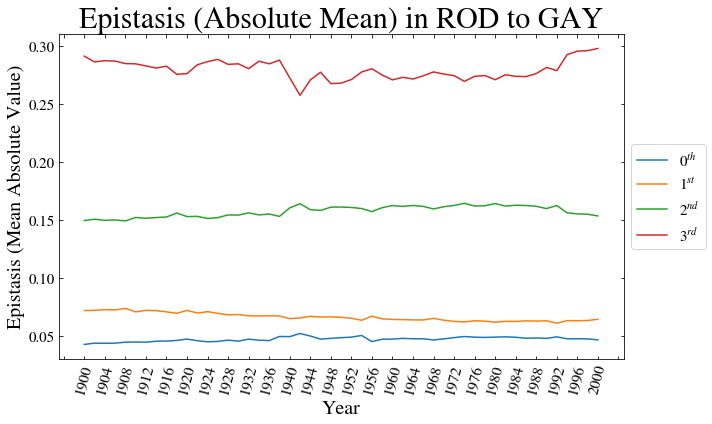

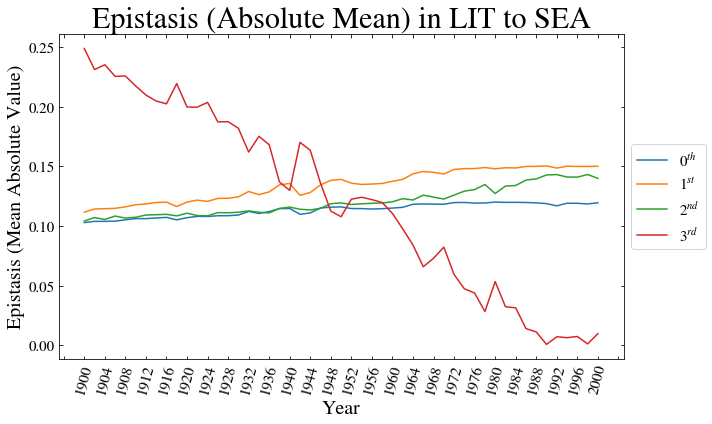

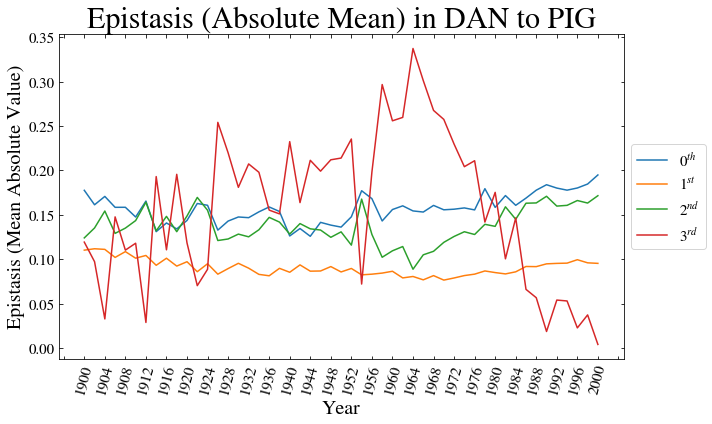

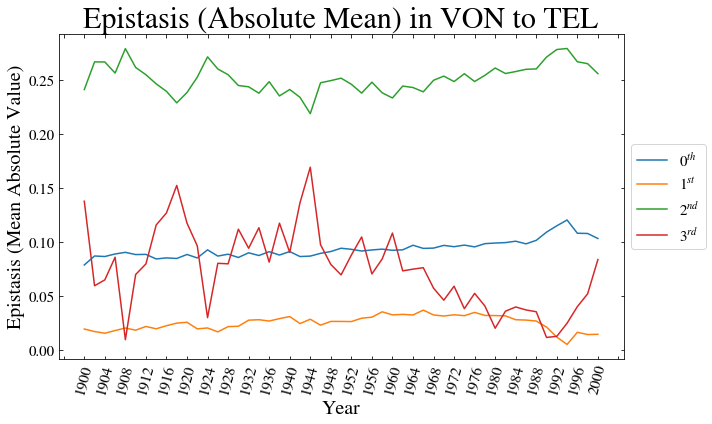

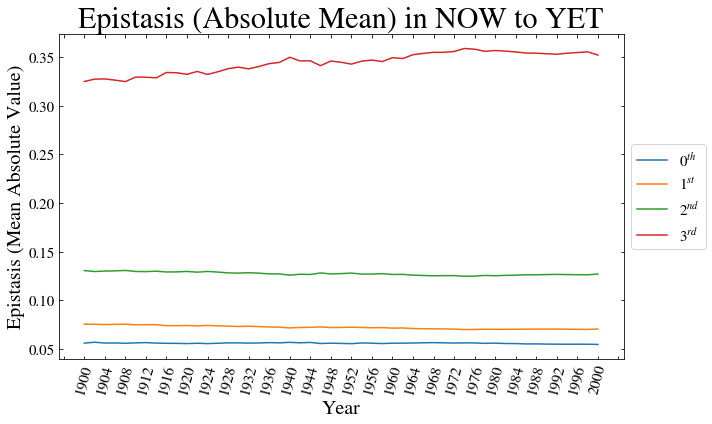

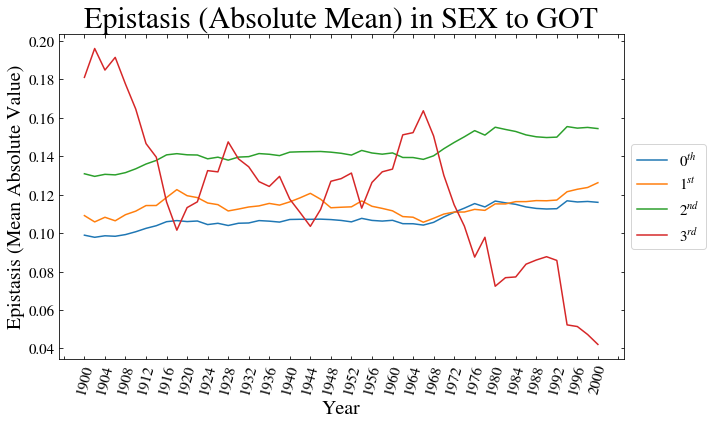

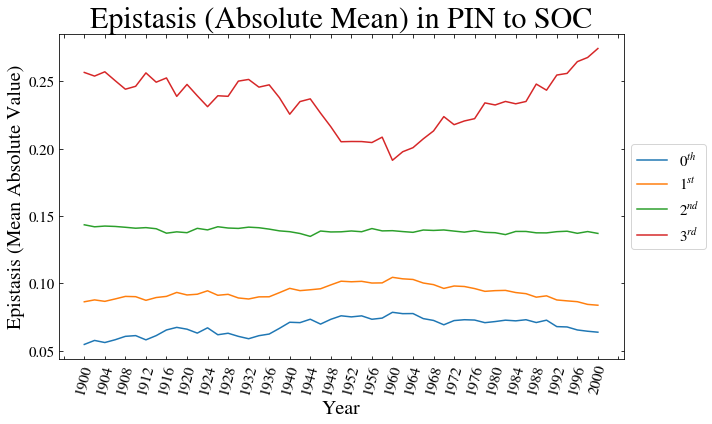

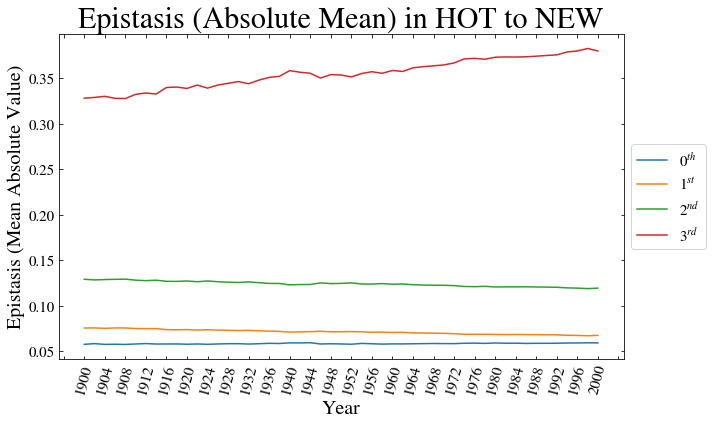

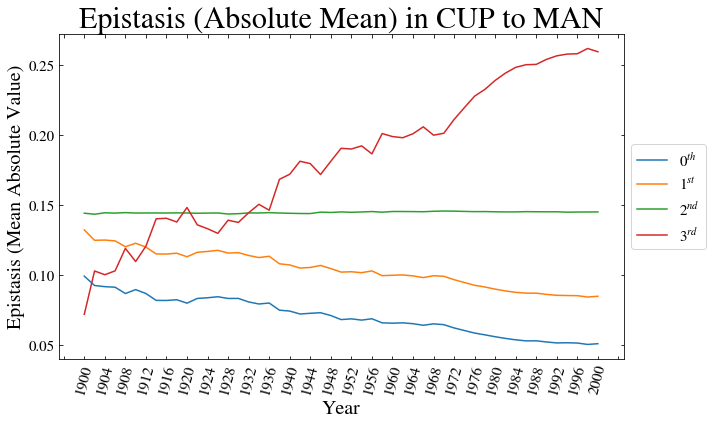

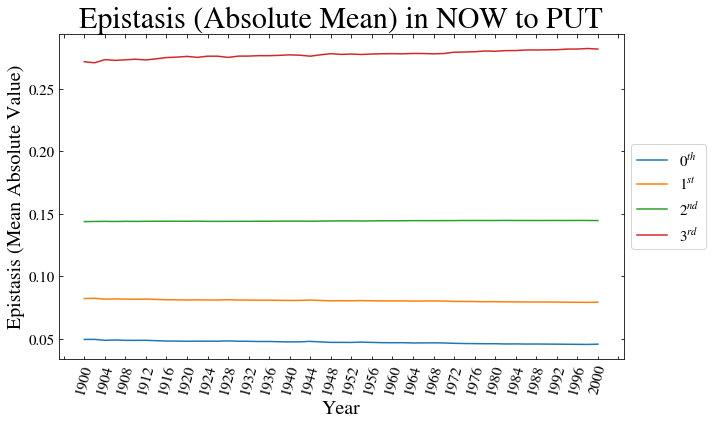

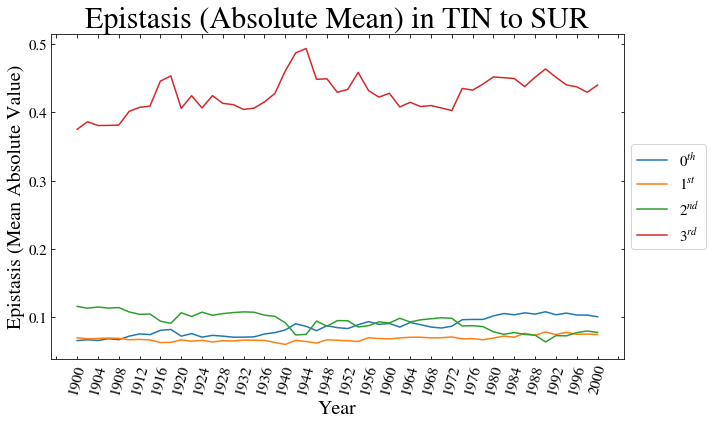

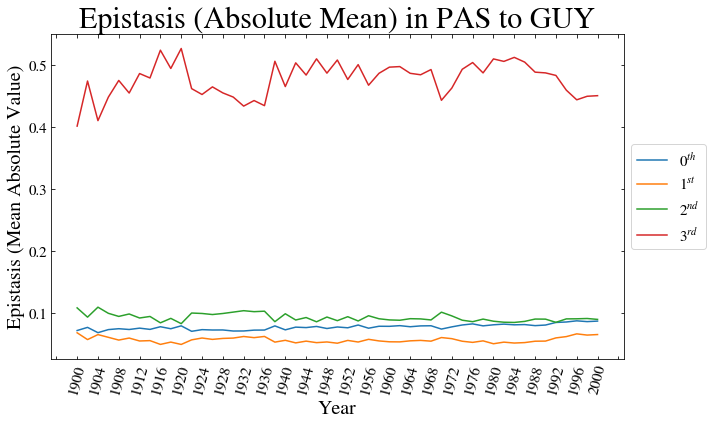

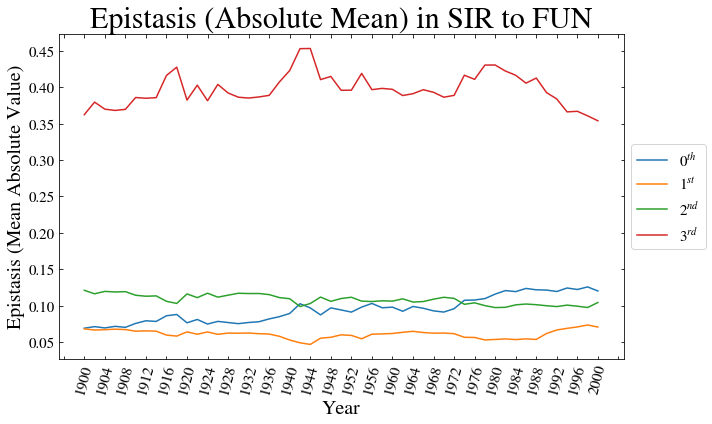

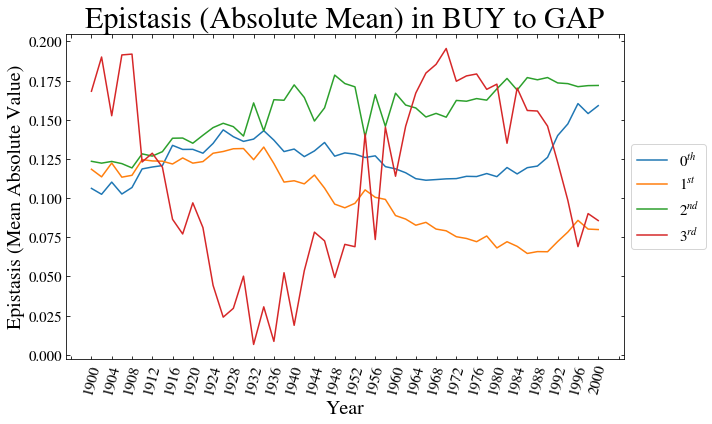

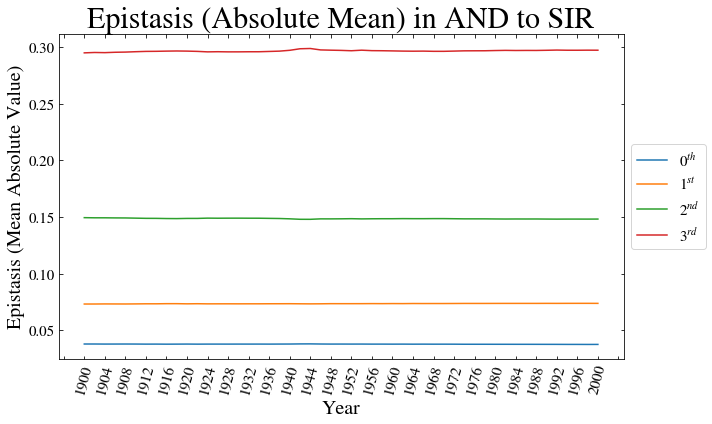

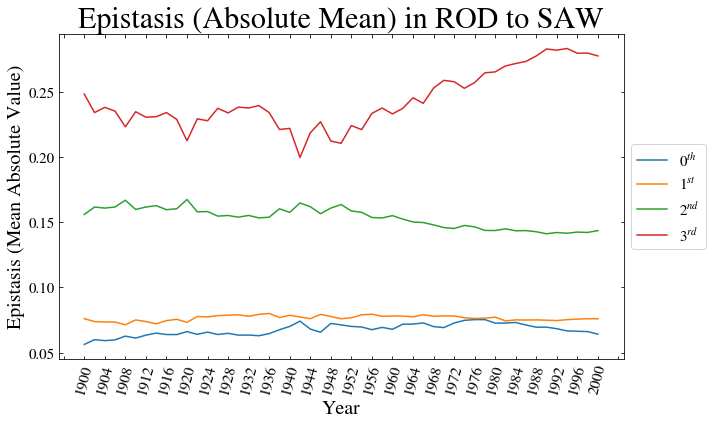

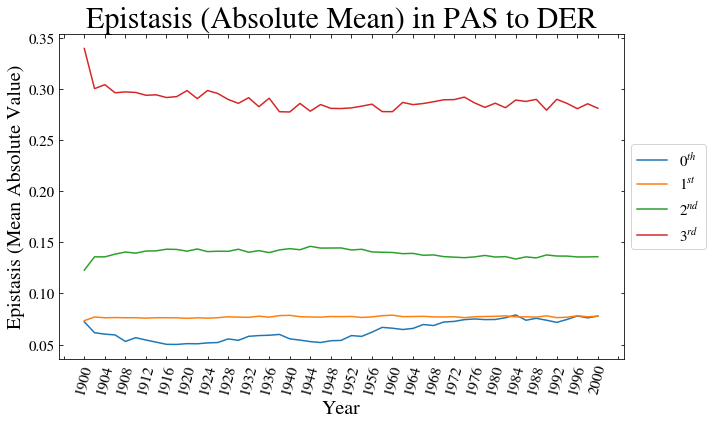

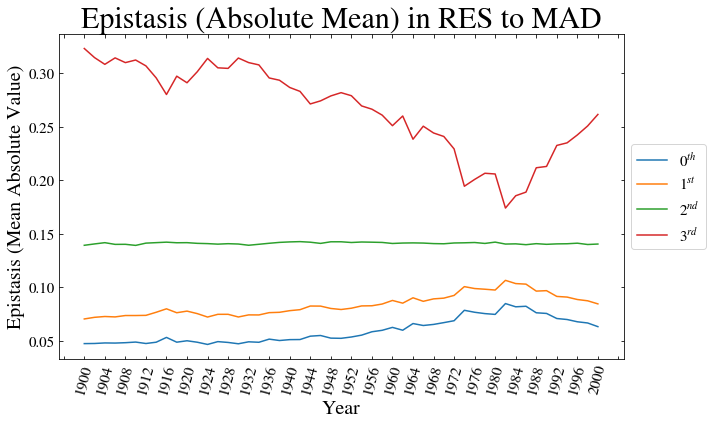

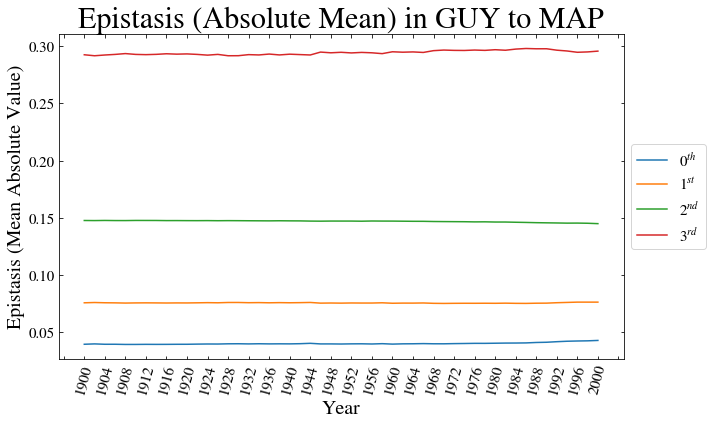

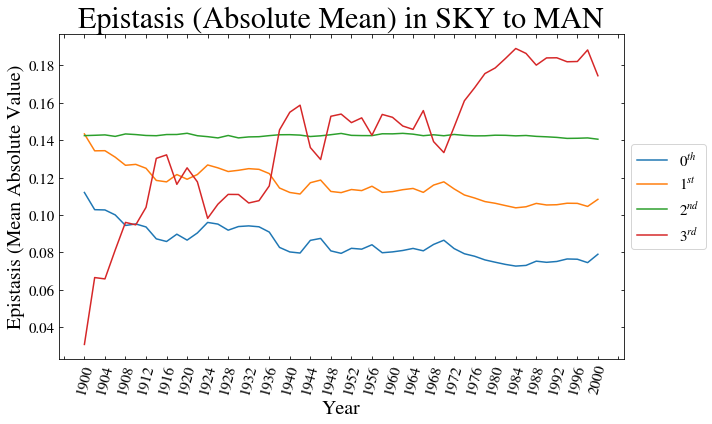

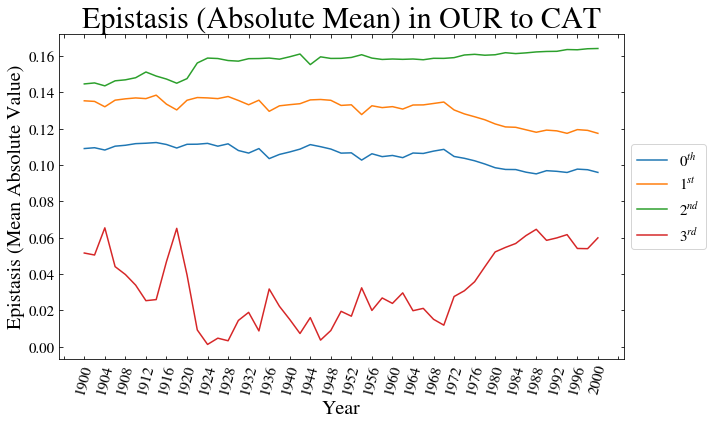

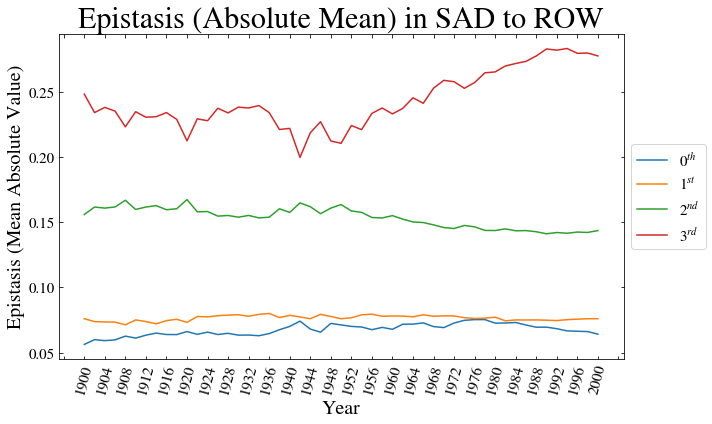

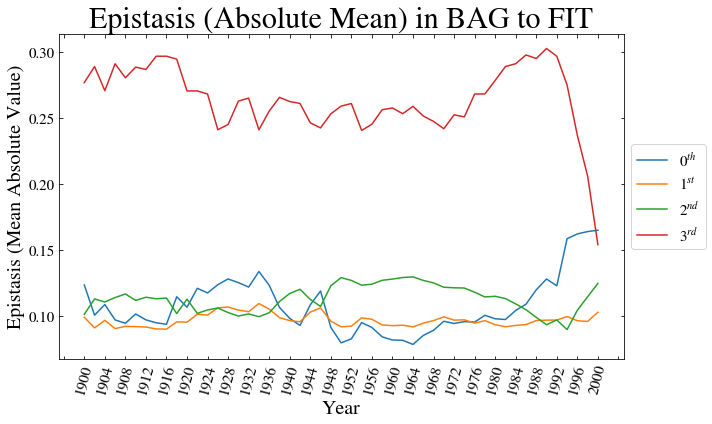

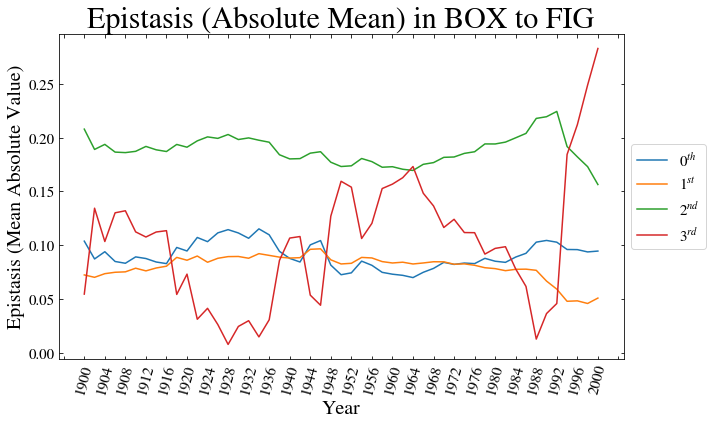

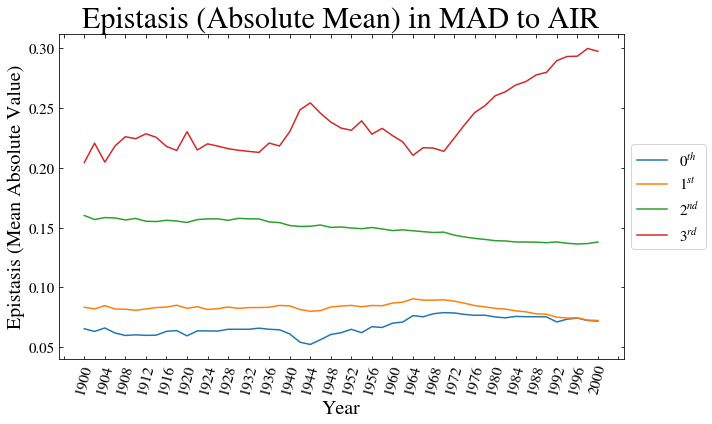

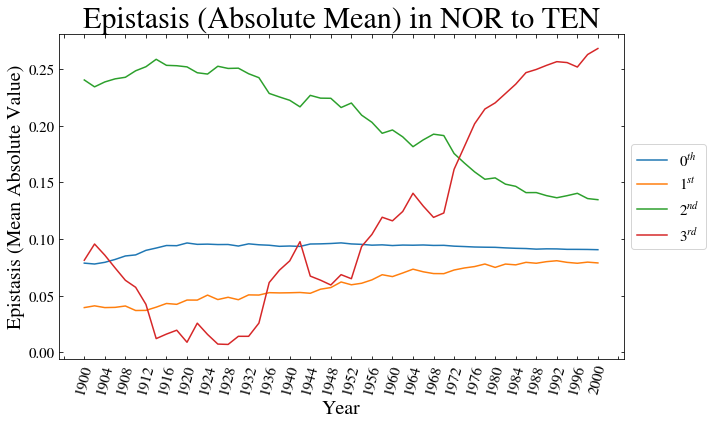

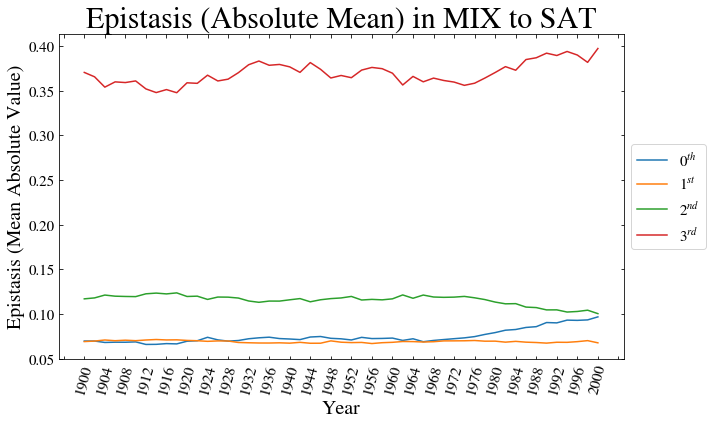

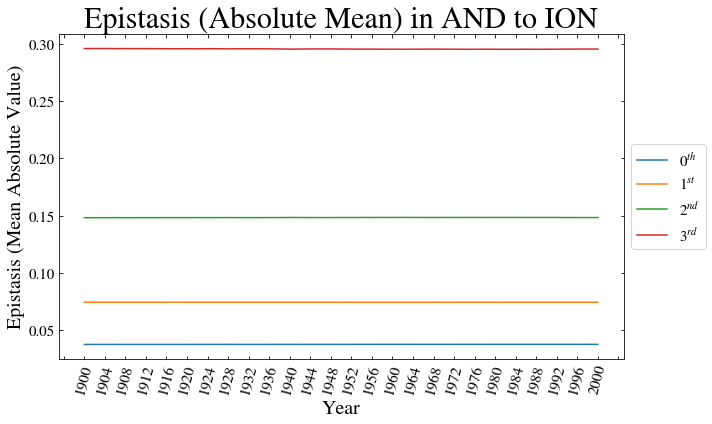

In [6]:
%%time
from scipy.linalg import hadamard
import matplotlib.ticker as ticker


mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'


da_words = Da_Words             # pairs of words to be graphed

year = data[0][1:]              # string of the years
order = ['$0^{th}$','$1^{st}$','$2^{nd}$','$3^{rd}$']                           # for 3 letter words
# order = ['$0^{th}$','$1^{st}$','$2^{nd}$','$3^{rd}$','$4^{th}$']              # for 3 letter words
# order = ['$0^{th}$','$1^{st}$','$2^{nd}$','$3^{rd}$','$4^{th}$','$5^{th}$']   # for 3 letter words

tick_spacing = 2                # sets how frequently years are displayed on the time axis

H = hadamard(len(bits))         # Hadamard matrix of the appropriate size
         
v = np.array([[0.5,0],[0,-1]])     # this initializes the diagonal matrix V_1
V = v

for i in range(2):    # for 3 letter words
# for i in range(3):  # for 4 letter words
# for i in range(4):  # for 5 letter words
    V = np.kron(V,v)

M = np.matmul(V,H)                 # here we multiply the diagonal matrix V with H
E = []

for j in range(len(W)):
    E.append([])
    for i in range(len(year)):
        E[j].append(np.array(M.dot(W[j][i])))


# definfing the mean absolute epistasis arrays

eabs = []
orders = list(map(len,indices))   # this gives a list of the order (weight) of each bit
pascal = [1,3,3,1]                    # for 3 letter words
# pascal = [1,4,6,4,1]                # for 4 letter words
# pascal = [1,5,10,10,5,1]            # for 5 letter words


# this constructs the eabs array: a collection of averages of absolute values of elements in E (for each year and word chain)

for k in range(len(W)):
    eabs.append([[],[],[],[]])          # for 3 letter words
#     eabs.append([[],[],[],[],[]])     # for 4 letter words
#     eabs.append([[],[],[],[],[],[]])  # for 5 letter words

    for each in E[k]:
        s = sum(list(map(abs,each)))            # delete the line below to turn on normalization
#         s = 1                                   # this shuts off the normalization of the epistasis
        for o in range(len(order)):
            epi_sum = sum(list(map(abs,[each[n] for (n,i) in enumerate(orders) if i==o]))) # sum of the abs(orders)
            eabs[k][o].append(epi_sum/(pascal[o] * s))

            
            
# plotting the mean abs epistasis over time

for j in range(len(W)):
    
    fig,ax = p.subplots(figsize=[10,6])
    
    for i in range(len(order)):
        ax.plot(year,eabs[j][i],label=order[i])

    p.xlabel('Year',fontsize=20)
    p.ylabel('Epistasis (Mean Absolute Value)',fontsize=20)
    p.xticks(rotation=75)
    p.tick_params(labelsize=15,axis='x',direction='in',top=1,right=1)
    p.tick_params(labelsize=15,axis='y',direction='in',top=1,right=1)
    p.title('Epistasis (Absolute Mean) in %s to %s' %(da_words[j][0],da_words[j][1]),fontsize=30)
    p.legend(loc='center left',bbox_to_anchor=(1,0.5),fontsize=15)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    
    p.tight_layout()

#     p.savefig('C:/Users/Miles/Documents/Brown/Ogbunu Lab/Evo Word/Epistasis/Figures/DaWords Graphs/3 Letters 1900 to 2000/%s to %s (normalized)' %(da_words[j][0],da_words[j][1]))   # for 3 letter words
#     p.savefig('C:/Users/Miles/Documents/Brown/Ogbunu Lab/Evo Word/Epistasis/Figures/DaWords Graphs/4 Letters 1900 to 2000/%s to %s (normalized)' %(da_words[j][0],da_words[j][1])) # for 4 letter words
#     p.savefig('C:/Users/Miles/Documents/Brown/Ogbunu Lab/Evo Word/Epistasis/Figures/DaWords Graphs/5 Letters 1900 to 2000/%s to %s (normalized)' %(da_words[j][0],da_words[j][1])) # for 5 letter words



### Plotting the Fitness Landscape

In [ ]:
for j in range(100):
    
    p.figure(figsize=[10,6])

    yrs = ['1972','1982','1990']                # years to graph

    # the landscape
    for yr in yrs:
        k = data[0].index(yr)-1
        p.plot(word_chain[j],W[j][k],label=yr)

    p.ylabel('Usage Count',fontsize=20)
    p.xticks(rotation=90)
    p.tick_params(labelsize=15,axis='x',direction='in',top=1,right=1)
    p.tick_params(labelsize=15,axis='y',direction='in',top=1,right=1)
    p.title('Fitness Landscape %s to %s' %(word_chain[j][0],word_chain[j][-1]),fontsize=30)
    p.legend(loc='center left',bbox_to_anchor=(1,0.5),fontsize=15)

    p.figure(figsize=[10,6])

    # the Hadamard transform
    for yr in yrs:
        k = data[0].index(yr)-1
        p.plot(bits,M.dot(W[j][k]),label=yr)

    p.ylabel('Walsh Space',fontsize=20)
    p.xticks(rotation=90)
    p.tick_params(labelsize=15,axis='x',direction='in',top=1,right=1)
    p.tick_params(labelsize=15,axis='y',direction='in',top=1,right=1)
    p.title('Hadamard Transform %s to %s' %(word_chain[j][0],word_chain[j][-1]),fontsize=30)
    p.legend(loc='center left',bbox_to_anchor=(1,0.5),fontsize=15)



In [8]:
np.shape(eabs)

(100, 4, 51)

### Plotting the Average Over All 100 Word Pairs

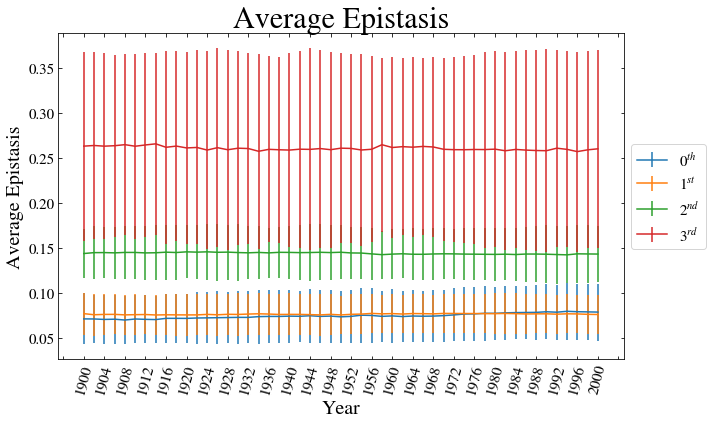

In [17]:
mean100 = []
err100 = []
for j in range(len(order)):
    mean100.append([])
    err100.append([])
    for yr in range(len(year)):
        Eabs = [eabs[k][j][yr] for k in range(100)]
        mean100[j].append(np.mean(Eabs))
        err100[j].append(np.std(Eabs))
        
        
fig,ax = p.subplots(figsize=[10,6])

for i in range(len(order)):
    p.errorbar(year,mean100[i],yerr=err100[i],label=order[i])
    
p.xlabel('Year',fontsize=20)
p.ylabel('Average Epistasis',fontsize=20)
p.xticks(rotation=75)
p.tick_params(labelsize=15,axis='x',direction='in',top=1,right=1)
p.tick_params(labelsize=15,axis='y',direction='in',top=1,right=1)
p.title('Average Epistasis',fontsize=30)
p.legend(loc='center left',bbox_to_anchor=(1,0.5),fontsize=15)
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))

p.tight_layout()

p.savefig('C:/Users/Miles/Documents/Brown/Ogbunu Lab/Evo Word/Epistasis/Figures/DaWords Graphs/3 Letter Average Epistasis')
# p.savefig('C:/Users/Miles/Documents/Brown/Ogbunu Lab/Evo Word/Epistasis/Figures/DaWords Graphs/4 Letter Average Epistasis')
# p.savefig('C:/Users/Miles/Documents/Brown/Ogbunu Lab/Evo Word/Epistasis/Figures/DaWords Graphs/5 Letter Average Epistasis')
